## 导入相关包

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore") 

## 读取数据（训练数据前10000行，测试数据前100条）

In [2]:
train_data = pd.read_csv('train_all.csv',nrows=10000)
test_data = pd.read_csv('test_all.csv',nrows=100)

In [3]:
train_data.head()

,user_id,merchant_id,age_range,gender,user_cnt,seller_nunique,cat_nunique,brand_nunique,item_nunique,time_stamp_nunique,...,embeeding_93,embeeding_94,embeeding_95,embeeding_96,embeeding_97,embeeding_98,embeeding_99,lgb_clf,xgb_clf,label
0,105600.0,1487.0,6.0,1.0,310.0,96.0,37.0,88.0,217.0,29.0,...,-0.134989,0.303419,0.266771,0.550492,-0.288001,-0.013458,-0.126127,0.937020,0.900148,0.0
1,110976.0,159.0,5.0,0.0,274.0,181.0,70.0,159.0,233.0,52.0,...,-0.174744,0.017232,0.062192,0.171915,-0.096151,0.106370,0.057648,0.936040,0.921565,0.0
2,374400.0,302.0,5.0,1.0,278.0,57.0,59.0,62.0,148.0,35.0,...,-0.183128,0.239354,-0.092803,0.730286,-0.048905,0.388345,0.544311,0.934771,0.940177,0.0
3,189312.0,1760.0,4.0,0.0,237.0,49.0,35.0,45.0,170.0,9.0,...,-0.784147,0.193582,-0.179953,0.649512,-0.177398,-0.297098,-0.130428,0.933861,0.908755,0.0
4,189312.0,2511.0,4.0,0.0,237.0,49.0,35.0,45.0,170.0,9.0,...,-0.784147,0.193582,-0.179953,0.649512,-0.177398,-0.297098,-0.130428,0.935519,0.924738,0.0


In [4]:
test_data.head()

,user_id,merchant_id,age_range,gender,user_cnt,seller_nunique,cat_nunique,brand_nunique,item_nunique,time_stamp_nunique,...,embeeding_92,embeeding_93,embeeding_94,embeeding_95,embeeding_96,embeeding_97,embeeding_98,embeeding_99,lgb_clf,xgb_clf
0,105600.0,1487.0,6.0,1.0,310.0,96.0,37.0,88.0,217.0,29.0,...,-0.087714,-0.134989,0.303419,0.266771,0.550492,-0.288001,-0.013458,-0.126127,0.932402,0.849386
1,110976.0,159.0,5.0,0.0,274.0,181.0,70.0,159.0,233.0,52.0,...,-0.171453,-0.174744,0.017232,0.062192,0.171915,-0.096151,0.106370,0.057648,0.932968,0.933467
2,374400.0,302.0,5.0,1.0,278.0,57.0,59.0,62.0,148.0,35.0,...,-0.308193,-0.183128,0.239354,-0.092803,0.730286,-0.048905,0.388345,0.544311,0.932518,0.929900
3,189312.0,1760.0,4.0,0.0,237.0,49.0,35.0,45.0,170.0,9.0,...,-0.121537,-0.784147,0.193582,-0.179953,0.649512,-0.177398,-0.297098,-0.130428,0.932740,0.928583
4,189312.0,2511.0,4.0,0.0,237.0,49.0,35.0,45.0,170.0,9.0,...,-0.121537,-0.784147,0.193582,-0.179953,0.649512,-0.177398,-0.297098,-0.130428,0.932740,0.927933


## 读取全部数据

In [5]:
# train_data = pd.read_csv('train_all.csv',nrows=None)
# test_data = pd.read_csv('test_all.csv',nrows=None)

In [6]:
train_data.columns

Index(['user_id', 'merchant_id', 'age_range', 'gender', 'user_cnt',
       'seller_nunique', 'cat_nunique', 'brand_nunique', 'item_nunique',
       'time_stamp_nunique',
       ...
       'embeeding_93', 'embeeding_94', 'embeeding_95', 'embeeding_96',
       'embeeding_97', 'embeeding_98', 'embeeding_99', 'lgb_clf', 'xgb_clf',
       'label'],
      dtype='object', length=231)

## 获取训练和测试数据

In [7]:
features_columns = [col for col in train_data.columns if col not in ['user_id','label']]
train = train_data[features_columns].values
test = test_data[features_columns].values
target =train_data['label'].values

## 切分40%数据用于线下验证

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)  

(1200, 229) (1200,)
(800, 229) (800,)


0.92875

## 交叉验证：评估估算器性能

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, n_jobs=-1)
scores = cross_val_score(clf, train, target, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) 

[0.9325 0.9325 0.9325 0.9325 0.93  ]
Accuracy: 0.93 (+/- 0.00)


## F1验证

In [10]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, n_jobs=-1)
scores = cross_val_score(clf, train, target, cv=5, scoring='f1_macro')
print(scores)  
print("F1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.48253558 0.48253558 0.48253558 0.48253558 0.48186528]
F1: 0.48 (+/- 0.00)


## ShuffleSplit切分数据

In [11]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, n_jobs=-1)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, train, target, cv=cv)  

array([0.915     , 0.93      , 0.92166667, 0.935     , 0.93333333])

## 自己写交叉验证

### KFlod切分数据

In [12]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, n_jobs=-1)
kf = KFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    X_train, X_test, y_train, y_test = train[train_index], train[test_index], target[train_index], target[test_index]
    clf = clf.fit(X_train, y_train)
    print(k, clf.score(X_test, y_test))

0 0.93
1 0.92
2 0.94
3 0.94
4 0.93


### StratifiedKFold切分数据(label均分)

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, n_jobs=-1)
skf = StratifiedKFold(n_splits=5)
for k, (train_index, test_index) in enumerate(skf.split(train, target)):
    X_train, X_test, y_train, y_test = train[train_index], train[test_index], target[train_index], target[test_index]
    clf = clf.fit(X_train, y_train)
    print(k, clf.score(X_test, y_test))

0 0.9325
1 0.9325
2 0.9325
3 0.9325
4 0.93


## 模型调参

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.5, random_state=0)

# model 
clf = RandomForestClassifier(n_jobs=-1)

# Set the parameters by cross-validation

tuned_parameters = {
                    'n_estimators': [50, 100, 200]
#                     ,'criterion': ['gini', 'entropy']
#                     ,'max_depth': [2, 5]
#                     ,'max_features': ['log2', 'sqrt', 'int']
#                     ,'bootstrap': [True, False]
#                     ,'warm_start': [True, False]
                    }

scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(clf, tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'n_estimators': 100}

Grid scores on development set:

0.486 (+/-0.081) for {'n_estimators': 50}
0.491 (+/-0.101) for {'n_estimators': 100}
0.486 (+/-0.081) for {'n_estimators': 200}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       932
         1.0       0.13      0.03      0.05        68

    accuracy                           0.92      1000
   macro avg       0.53      0.51      0.50      1000
weighted avg       0.88      0.92      0.90      1000




## 模糊矩阵

Confusion matrix, without normalization
[[452   7]
 [ 40   1]]
Normalized confusion matrix
[[0.98 0.02]
 [0.98 0.02]]


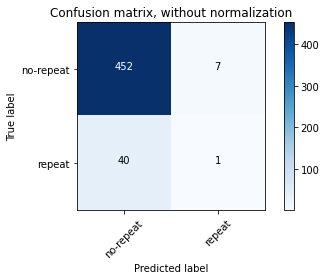

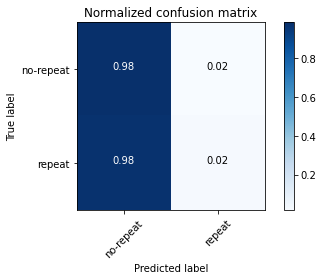

In [15]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# label name
class_names = ['no-repeat', 'repeat']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
clf = RandomForestClassifier(n_jobs=-1)
y_pred = clf.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [16]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# label name
class_names = ['no-repeat', 'repeat']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
clf = RandomForestClassifier(n_jobs=-1)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

   no-repeat       0.92      0.98      0.95       459
      repeat       0.11      0.02      0.04        41

    accuracy                           0.90       500
   macro avg       0.51      0.50      0.49       500
weighted avg       0.85      0.90      0.87       500



## 不同的分类模型

### LR 模型

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X = stdScaler.fit_transform(train)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
clf.score(X_test, y_test)

0.898

### KNN 模型

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X = stdScaler.fit_transform(train)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9

In [20]:
# clf.predict(X_test)

In [21]:
# clf.predict_proba(X_test)

## GaussianNB 模型

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X = stdScaler.fit_transform(train)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

clf = GaussianNB().fit(X_train, y_train)
clf.score(X_test, y_test)

0.514

## tree树模型

In [23]:
from sklearn import tree

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.86

## bagging模型

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.918

## 随机森林模型

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = clf = RandomForestClassifier(n_estimators=10, max_depth=3, min_samples_split=12, random_state=0)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.918

## ExTree模型

In [26]:
from sklearn.ensemble import ExtraTreesClassifier

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.902

In [27]:
clf.n_features_

229

In [28]:
clf.feature_importances_[:10]

array([0.07, 0.01, 0.  , 0.01, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ])

## AdaBoost模型

In [29]:
from sklearn.ensemble import AdaBoostClassifier

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = AdaBoostClassifier(n_estimators=10)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.912

## GBDT模型

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.902

## VOTE模型投票

In [31]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X = stdScaler.fit_transform(train)
y = target


clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.89 (+/- 0.01) [Logistic Regression]
Accuracy: 0.93 (+/- 0.01) [Random Forest]
Accuracy: 0.49 (+/- 0.03) [naive Bayes]
Accuracy: 0.89 (+/- 0.02) [Ensemble]


## lgb 模型

In [32]:
import lightgbm

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.4, random_state=0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

clf = lightgbm

train_matrix = clf.Dataset(X_train, label=y_train)
test_matrix = clf.Dataset(X_test, label=y_test)
params = {
          'boosting_type': 'gbdt',
          #'boosting_type': 'dart',
          'objective': 'multiclass',
          'metric': 'multi_logloss',
          'min_child_weight': 1.5,
          'num_leaves': 2**5,
          'lambda_l2': 10,
          'subsample': 0.7,
          'colsample_bytree': 0.7,
          'colsample_bylevel': 0.7,
          'learning_rate': 0.03,
          'tree_method': 'exact',
          'seed': 2017,
          "num_class": 2,
          'silent': True,
          }
num_round = 10000
early_stopping_rounds = 100
model = clf.train(params, 
                  train_matrix,
                  num_round,
                  valid_sets=test_matrix,
                  early_stopping_rounds=early_stopping_rounds)
pre= model.predict(X_valid,num_iteration=model.best_iteration)

[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32114
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 224
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Start training from score -0.068100
[LightGBM] [Info] Start training from score -2.720629
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[44]	valid_0's multi_logloss: 0.261799
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[45]	valid_0's multi_logloss: 0.262228
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[46]	valid_0's multi_logloss: 0.26256
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[47]	valid_0's multi_logloss: 0.262882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[48]	valid_0's multi_logloss: 0.263128
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[91]	valid_0's multi_logloss: 0.272813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[92]	valid_0's multi_logloss: 0.273117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[93]	valid_0's multi_logloss: 0.273195
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[94]	valid_0's multi_logloss: 0.273214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[95]	valid_0's multi_logloss: 0.273512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [37]:
print('score : ', np.mean((pre[:,1]>0.5)==y_valid))

score :  0.9275


## xgb 模型

In [38]:
import xgboost

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.4, random_state=0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

clf = xgboost

train_matrix = clf.DMatrix(X_train, label=y_train, missing=-1)
test_matrix = clf.DMatrix(X_test, label=y_test, missing=-1)
z = clf.DMatrix(X_valid, label=y_valid, missing=-1)
params = {'booster': 'gbtree',
          'objective': 'multi:softprob',
          'eval_metric': 'mlogloss',
          'gamma': 1,
          'min_child_weight': 1.5,
          'max_depth': 5,
          'lambda': 100,
          'subsample': 0.7,
          'colsample_bytree': 0.7,
          'colsample_bylevel': 0.7,
          'eta': 0.03,
          'tree_method': 'exact',
          'seed': 2017,
          "num_class": 2
          }

num_round = 10000
early_stopping_rounds = 100
watchlist = [(train_matrix, 'train'),
             (test_matrix, 'eval')
             ]

model = clf.train(params,
                  train_matrix,
                  num_boost_round=num_round,
                  evals=watchlist,
                  early_stopping_rounds=early_stopping_rounds
                  )
pre = model.predict(z,ntree_limit=model.best_ntree_limit)

[0]	train-mlogloss:0.67487	eval-mlogloss:0.67581
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 100 rounds.
[1]	train-mlogloss:0.65746	eval-mlogloss:0.65883
[2]	train-mlogloss:0.64073	eval-mlogloss:0.64284
[3]	train-mlogloss:0.62480	eval-mlogloss:0.62738
[4]	train-mlogloss:0.60953	eval-mlogloss:0.61246
[5]	train-mlogloss:0.59514	eval-mlogloss:0.59874
[6]	train-mlogloss:0.58115	eval-mlogloss:0.58518
[7]	train-mlogloss:0.56781	eval-mlogloss:0.57246
[8]	train-mlogloss:0.55490	eval-mlogloss:0.55986
[9]	train-mlogloss:0.54298	eval-mlogloss:0.54840
[10]	train-mlogloss:0.53141	eval-mlogloss:0.53710
[11]	train-mlogloss:0.52016	eval-mlogloss:0.52651
[12]	train-mlogloss:0.50956	eval-mlogloss:0.51621
[13]	train-mlogloss:0.49935	eval-mlogloss:0.50619
[14]	train-mlogloss:0.48950	eval-mlogloss:0.49689
[15]	train-mlogloss:0.48017	eval-mlogloss:0.48805
[16]	train-mlogloss:0.47116	eval-mlogloss:0.47954
[17]	tra

[160]	train-mlogloss:0.21721	eval-mlogloss:0.25851
[161]	train-mlogloss:0.21698	eval-mlogloss:0.25850
[162]	train-mlogloss:0.21687	eval-mlogloss:0.25849
[163]	train-mlogloss:0.21674	eval-mlogloss:0.25843
[164]	train-mlogloss:0.21659	eval-mlogloss:0.25847
[165]	train-mlogloss:0.21649	eval-mlogloss:0.25848
[166]	train-mlogloss:0.21634	eval-mlogloss:0.25846
[167]	train-mlogloss:0.21614	eval-mlogloss:0.25853
[168]	train-mlogloss:0.21601	eval-mlogloss:0.25849
[169]	train-mlogloss:0.21584	eval-mlogloss:0.25850
[170]	train-mlogloss:0.21573	eval-mlogloss:0.25849
[171]	train-mlogloss:0.21559	eval-mlogloss:0.25852
[172]	train-mlogloss:0.21543	eval-mlogloss:0.25854
[173]	train-mlogloss:0.21530	eval-mlogloss:0.25848
[174]	train-mlogloss:0.21515	eval-mlogloss:0.25849
[175]	train-mlogloss:0.21492	eval-mlogloss:0.25853
[176]	train-mlogloss:0.21477	eval-mlogloss:0.25857
[177]	train-mlogloss:0.21466	eval-mlogloss:0.25861
[178]	train-mlogloss:0.21457	eval-mlogloss:0.25857
[179]	train-mlogloss:0.21443	ev

In [33]:
print('score : ', np.mean((pre[:,1]>0.3)==y_valid))

score :  0.9275


# 自己封装模型

## Stacking,Bootstrap,Bagging技术实践

In [34]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [36]:
class SBBTree():
    """
        SBBTree
        Stacking,Bootstap,Bagging
    """
    def __init__(
                    self, 
                    params,
                    stacking_num,
                    bagging_num,
                    bagging_test_size,
                    num_boost_round,
                    early_stopping_rounds
                ):
        """
            Initializes the SBBTree.
            Args:
              params : lgb params.
              stacking_num : k_flod stacking.
              bagging_num : bootstrap num.
              bagging_test_size : bootstrap sample rate.
              num_boost_round : boost num.
              early_stopping_rounds : early_stopping_rounds.
        """
        self.params = params
        self.stacking_num = stacking_num
        self.bagging_num = bagging_num
        self.bagging_test_size = bagging_test_size
        self.num_boost_round = num_boost_round
        self.early_stopping_rounds = early_stopping_rounds

        self.model = lgb
        self.stacking_model = []
        self.bagging_model = []

    def fit(self, X, y):
        """ fit model. """
        if self.stacking_num > 1:
            layer_train = np.zeros((X.shape[0], 2))
            self.SK = StratifiedKFold(n_splits=self.stacking_num, shuffle=True, random_state=1)
            for k,(train_index, test_index) in enumerate(self.SK.split(X, y)):
                X_train = X[train_index]
                y_train = y[train_index]
                X_test = X[test_index]
                y_test = y[test_index]

                lgb_train = lgb.Dataset(X_train, y_train)
                lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

                gbm = lgb.train(self.params,
                            lgb_train,
                            num_boost_round=self.num_boost_round,
                            valid_sets=lgb_eval,
                            early_stopping_rounds=self.early_stopping_rounds)

                self.stacking_model.append(gbm)

                pred_y = gbm.predict(X_test, num_iteration=gbm.best_iteration)
                layer_train[test_index, 1] = pred_y

            X = np.hstack((X, layer_train[:,1].reshape((-1,1)))) 
        else:
            pass
        for bn in range(self.bagging_num):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.bagging_test_size, random_state=bn)

            lgb_train = lgb.Dataset(X_train, y_train)
            lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

            gbm = lgb.train(self.params,
                        lgb_train,
                        num_boost_round=10000,
                        valid_sets=lgb_eval,
                        early_stopping_rounds=200)

            self.bagging_model.append(gbm)

    def predict(self, X_pred):
        """ predict test data. """
        if self.stacking_num > 1:
            test_pred = np.zeros((X_pred.shape[0], self.stacking_num))
            for sn,gbm in enumerate(self.stacking_model):
                pred = gbm.predict(X_pred, num_iteration=gbm.best_iteration)
                test_pred[:, sn] = pred
            X_pred = np.hstack((X_pred, test_pred.mean(axis=1).reshape((-1,1))))  
        else:
            pass 
        for bn,gbm in enumerate(self.bagging_model):
            pred = gbm.predict(X_pred, num_iteration=gbm.best_iteration)
            if bn == 0:
                pred_out=pred
            else:
                pred_out+=pred
        return pred_out/self.bagging_num

## 测试自己封装的模型类

In [37]:
"""
    TEST CODE
"""
from sklearn.datasets import make_classification
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_gaussian_quantiles
from sklearn import metrics
from sklearn.metrics import f1_score
# X, y = make_classification(n_samples=1000, n_features=25, n_clusters_per_class=1, n_informative=15, random_state=1)
X, y = make_gaussian_quantiles(mean=None, cov=1.0, n_samples=1000, n_features=50, n_classes=2, shuffle=True, random_state=2)
# data = load_breast_cancer()
# X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'auc',
        'num_leaves': 9,
        'learning_rate': 0.03,
        'feature_fraction_seed': 2,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'min_data': 20,
        'min_hessian': 1,
        'verbose': -1,
        'silent': 0
        }
# test 1
model = SBBTree(params=params, stacking_num=2, bagging_num=1,  bagging_test_size=0.33, num_boost_round=10000, early_stopping_rounds=200)
model.fit(X,y)
X_pred = X[0].reshape((1,-1))
pred=model.predict(X_pred)
print('pred')
print(pred)
print('TEST 1 ok')


# test 1
model = SBBTree(params, stacking_num=1, bagging_num=1, bagging_test_size=0.33, num_boost_round=10000, early_stopping_rounds=200)
model.fit(X_train,y_train)
pred1=model.predict(X_test)

# test 2 
model = SBBTree(params, stacking_num=1, bagging_num=3, bagging_test_size=0.33, num_boost_round=10000, early_stopping_rounds=200)
model.fit(X_train,y_train)
pred2=model.predict(X_test)

# test 3 
model = SBBTree(params, stacking_num=5, bagging_num=1, bagging_test_size=0.33, num_boost_round=10000, early_stopping_rounds=200)
model.fit(X_train,y_train)
pred3=model.predict(X_test)

# test 4 
model = SBBTree(params, stacking_num=5, bagging_num=3, bagging_test_size=0.33, num_boost_round=10000, early_stopping_rounds=200)
model.fit(X_train,y_train)
pred4=model.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test+1, pred1, pos_label=2)
print('auc: ',metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_test+1, pred2, pos_label=2)
print('auc: ',metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_test+1, pred3, pos_label=2)
print('auc: ',metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_test+1, pred4, pos_label=2)
print('auc: ',metrics.auc(fpr, tpr))


# auc:  0.7281621243885396
# auc:  0.7710471146419509
# auc:  0.7894369046305492
# auc:  0.8084519474787597

[LightGBM] [Warning] Unknown parameter: silent
[1]	valid_0's auc: 0.596296
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.590672
[3]	valid_0's auc: 0.604024
[4]	valid_0's auc: 0.601944
[5]	valid_0's auc: 0.600328
[6]	valid_0's auc: 0.605528
[7]	valid_0's auc: 0.602752
[8]	valid_0's auc: 0.602128
[9]	valid_0's auc: 0.603008
[10]	valid_0's auc: 0.599808
[11]	valid_0's auc: 0.606144
[12]	valid_0's auc: 0.613048
[13]	valid_0's auc: 0.61704
[14]	valid_0's auc: 0.613536
[15]	valid_0's auc: 0.615736
[16]	valid_0's auc: 0.618096
[17]	valid_0's auc: 0.623376
[18]	valid_0's auc: 0.622992
[19]	valid_0's auc: 0.624112
[20]	valid_0's auc: 0.62256
[21]	valid_0's auc: 0.624368
[22]	valid_0's auc: 0.625728
[23]	valid_0's auc: 0.624672
[24]	valid_0's auc: 0.622464
[25]	valid_0's auc: 0.622816
[26]	valid_0's auc: 0.625328
[27]	valid_0's auc: 0.623872
[28]	valid_0's auc: 0.624656
[29]	valid_0's auc: 0.6212
[30]	valid_0's auc: 0.619584
[31]	valid_0's auc: 0.622384
[32]	

[280]	valid_0's auc: 0.735168
[281]	valid_0's auc: 0.734608
[282]	valid_0's auc: 0.735024
[283]	valid_0's auc: 0.735136
[284]	valid_0's auc: 0.734816
[285]	valid_0's auc: 0.735392
[286]	valid_0's auc: 0.735248
[287]	valid_0's auc: 0.736048
[288]	valid_0's auc: 0.73536
[289]	valid_0's auc: 0.735504
[290]	valid_0's auc: 0.7356
[291]	valid_0's auc: 0.7352
[292]	valid_0's auc: 0.735248
[293]	valid_0's auc: 0.73576
[294]	valid_0's auc: 0.736464
[295]	valid_0's auc: 0.736432
[296]	valid_0's auc: 0.737712
[297]	valid_0's auc: 0.73896
[298]	valid_0's auc: 0.739072
[299]	valid_0's auc: 0.739392
[300]	valid_0's auc: 0.740128
[301]	valid_0's auc: 0.739792
[302]	valid_0's auc: 0.738912
[303]	valid_0's auc: 0.739728
[304]	valid_0's auc: 0.739728
[305]	valid_0's auc: 0.740016
[306]	valid_0's auc: 0.739984
[307]	valid_0's auc: 0.740384
[308]	valid_0's auc: 0.740256
[309]	valid_0's auc: 0.740512
[310]	valid_0's auc: 0.74088
[311]	valid_0's auc: 0.74136
[312]	valid_0's auc: 0.74184
[313]	valid_0's auc:

[588]	valid_0's auc: 0.759888
[589]	valid_0's auc: 0.759888
[590]	valid_0's auc: 0.75984
[591]	valid_0's auc: 0.759408
[592]	valid_0's auc: 0.759968
[593]	valid_0's auc: 0.76032
[594]	valid_0's auc: 0.760304
[595]	valid_0's auc: 0.760368
[596]	valid_0's auc: 0.760352
[597]	valid_0's auc: 0.76032
[598]	valid_0's auc: 0.7596
[599]	valid_0's auc: 0.760272
[600]	valid_0's auc: 0.76032
[601]	valid_0's auc: 0.760384
[602]	valid_0's auc: 0.760928
[603]	valid_0's auc: 0.761072
[604]	valid_0's auc: 0.76096
[605]	valid_0's auc: 0.760496
[606]	valid_0's auc: 0.760672
[607]	valid_0's auc: 0.760448
[608]	valid_0's auc: 0.760048
[609]	valid_0's auc: 0.759376
[610]	valid_0's auc: 0.759632
[611]	valid_0's auc: 0.759888
[612]	valid_0's auc: 0.75976
[613]	valid_0's auc: 0.759648
[614]	valid_0's auc: 0.759664
[615]	valid_0's auc: 0.759792
[616]	valid_0's auc: 0.760144
[617]	valid_0's auc: 0.760176
[618]	valid_0's auc: 0.76056
[619]	valid_0's auc: 0.760512
[620]	valid_0's auc: 0.760368
[621]	valid_0's auc

[128]	valid_0's auc: 0.732352
[129]	valid_0's auc: 0.732928
[130]	valid_0's auc: 0.7348
[131]	valid_0's auc: 0.735872
[132]	valid_0's auc: 0.735952
[133]	valid_0's auc: 0.73616
[134]	valid_0's auc: 0.737792
[135]	valid_0's auc: 0.738176
[136]	valid_0's auc: 0.737776
[137]	valid_0's auc: 0.738
[138]	valid_0's auc: 0.738704
[139]	valid_0's auc: 0.737984
[140]	valid_0's auc: 0.73864
[141]	valid_0's auc: 0.73704
[142]	valid_0's auc: 0.736224
[143]	valid_0's auc: 0.736816
[144]	valid_0's auc: 0.736752
[145]	valid_0's auc: 0.736608
[146]	valid_0's auc: 0.737328
[147]	valid_0's auc: 0.73688
[148]	valid_0's auc: 0.737424
[149]	valid_0's auc: 0.738192
[150]	valid_0's auc: 0.737952
[151]	valid_0's auc: 0.739488
[152]	valid_0's auc: 0.740032
[153]	valid_0's auc: 0.740352
[154]	valid_0's auc: 0.740848
[155]	valid_0's auc: 0.741808
[156]	valid_0's auc: 0.742272
[157]	valid_0's auc: 0.74312
[158]	valid_0's auc: 0.743568
[159]	valid_0's auc: 0.742512
[160]	valid_0's auc: 0.74256
[161]	valid_0's auc: 

[423]	valid_0's auc: 0.787824
[424]	valid_0's auc: 0.787648
[425]	valid_0's auc: 0.787376
[426]	valid_0's auc: 0.786704
[427]	valid_0's auc: 0.7868
[428]	valid_0's auc: 0.787312
[429]	valid_0's auc: 0.78712
[430]	valid_0's auc: 0.786656
[431]	valid_0's auc: 0.786624
[432]	valid_0's auc: 0.786992
[433]	valid_0's auc: 0.786576
[434]	valid_0's auc: 0.787312
[435]	valid_0's auc: 0.787344
[436]	valid_0's auc: 0.788
[437]	valid_0's auc: 0.788048
[438]	valid_0's auc: 0.787728
[439]	valid_0's auc: 0.787856
[440]	valid_0's auc: 0.78824
[441]	valid_0's auc: 0.787728
[442]	valid_0's auc: 0.787904
[443]	valid_0's auc: 0.786864
[444]	valid_0's auc: 0.786496
[445]	valid_0's auc: 0.786
[446]	valid_0's auc: 0.786464
[447]	valid_0's auc: 0.786704
[448]	valid_0's auc: 0.786528
[449]	valid_0's auc: 0.786672
[450]	valid_0's auc: 0.786528
[451]	valid_0's auc: 0.786288
[452]	valid_0's auc: 0.786464
[453]	valid_0's auc: 0.786512
[454]	valid_0's auc: 0.786736
[455]	valid_0's auc: 0.786496
[456]	valid_0's auc:

[718]	valid_0's auc: 0.786848
[719]	valid_0's auc: 0.786688
[720]	valid_0's auc: 0.787008
[721]	valid_0's auc: 0.786832
[722]	valid_0's auc: 0.786896
[723]	valid_0's auc: 0.78672
[724]	valid_0's auc: 0.786976
[725]	valid_0's auc: 0.786976
[726]	valid_0's auc: 0.786752
[727]	valid_0's auc: 0.786688
[728]	valid_0's auc: 0.78696
[729]	valid_0's auc: 0.786832
[730]	valid_0's auc: 0.786832
[731]	valid_0's auc: 0.787136
[732]	valid_0's auc: 0.786944
[733]	valid_0's auc: 0.786992
[734]	valid_0's auc: 0.786912
[735]	valid_0's auc: 0.78656
[736]	valid_0's auc: 0.78672
[737]	valid_0's auc: 0.786448
[738]	valid_0's auc: 0.786608
[739]	valid_0's auc: 0.786608
[740]	valid_0's auc: 0.786544
[741]	valid_0's auc: 0.786544
[742]	valid_0's auc: 0.786624
[743]	valid_0's auc: 0.786544
[744]	valid_0's auc: 0.78656
[745]	valid_0's auc: 0.786352
[746]	valid_0's auc: 0.786464
[747]	valid_0's auc: 0.786624
[748]	valid_0's auc: 0.786608
[749]	valid_0's auc: 0.78696
[750]	valid_0's auc: 0.787056
[751]	valid_0's 

[209]	valid_0's auc: 0.788158
[210]	valid_0's auc: 0.788783
[211]	valid_0's auc: 0.788673
[212]	valid_0's auc: 0.788416
[213]	valid_0's auc: 0.788489
[214]	valid_0's auc: 0.788636
[215]	valid_0's auc: 0.789114
[216]	valid_0's auc: 0.788673
[217]	valid_0's auc: 0.788746
[218]	valid_0's auc: 0.788893
[219]	valid_0's auc: 0.78904
[220]	valid_0's auc: 0.78893
[221]	valid_0's auc: 0.789077
[222]	valid_0's auc: 0.79029
[223]	valid_0's auc: 0.790547
[224]	valid_0's auc: 0.790621
[225]	valid_0's auc: 0.791209
[226]	valid_0's auc: 0.791099
[227]	valid_0's auc: 0.791429
[228]	valid_0's auc: 0.791062
[229]	valid_0's auc: 0.791135
[230]	valid_0's auc: 0.790694
[231]	valid_0's auc: 0.790474
[232]	valid_0's auc: 0.790694
[233]	valid_0's auc: 0.790621
[234]	valid_0's auc: 0.790069
[235]	valid_0's auc: 0.789886
[236]	valid_0's auc: 0.79051
[237]	valid_0's auc: 0.791393
[238]	valid_0's auc: 0.791723
[239]	valid_0's auc: 0.792054
[240]	valid_0's auc: 0.791576
[241]	valid_0's auc: 0.792348
[242]	valid_0'

[505]	valid_0's auc: 0.806829
[506]	valid_0's auc: 0.807159
[507]	valid_0's auc: 0.806829
[508]	valid_0's auc: 0.806645
[509]	valid_0's auc: 0.806461
[510]	valid_0's auc: 0.806608
[511]	valid_0's auc: 0.806645
[512]	valid_0's auc: 0.806571
[513]	valid_0's auc: 0.806645
[514]	valid_0's auc: 0.806571
[515]	valid_0's auc: 0.806902
[516]	valid_0's auc: 0.806865
[517]	valid_0's auc: 0.806976
[518]	valid_0's auc: 0.806976
[519]	valid_0's auc: 0.806718
[520]	valid_0's auc: 0.807086
[521]	valid_0's auc: 0.806865
[522]	valid_0's auc: 0.806829
[523]	valid_0's auc: 0.806645
[524]	valid_0's auc: 0.806571
[525]	valid_0's auc: 0.806498
[526]	valid_0's auc: 0.806241
[527]	valid_0's auc: 0.806277
[528]	valid_0's auc: 0.8058
[529]	valid_0's auc: 0.805506
[530]	valid_0's auc: 0.805285
[531]	valid_0's auc: 0.805616
[532]	valid_0's auc: 0.805726
[533]	valid_0's auc: 0.805469
[534]	valid_0's auc: 0.805065
[535]	valid_0's auc: 0.805322
[536]	valid_0's auc: 0.805322
[537]	valid_0's auc: 0.805028
[538]	valid_

[155]	valid_0's auc: 0.739741
[156]	valid_0's auc: 0.741291
[157]	valid_0's auc: 0.742351
[158]	valid_0's auc: 0.740393
[159]	valid_0's auc: 0.742107
[160]	valid_0's auc: 0.741535
[161]	valid_0's auc: 0.739577
[162]	valid_0's auc: 0.739577
[163]	valid_0's auc: 0.740801
[164]	valid_0's auc: 0.738354
[165]	valid_0's auc: 0.736967
[166]	valid_0's auc: 0.736722
[167]	valid_0's auc: 0.735009
[168]	valid_0's auc: 0.733377
[169]	valid_0's auc: 0.733132
[170]	valid_0's auc: 0.732235
[171]	valid_0's auc: 0.732316
[172]	valid_0's auc: 0.734601
[173]	valid_0's auc: 0.736151
[174]	valid_0's auc: 0.735988
[175]	valid_0's auc: 0.738109
[176]	valid_0's auc: 0.738925
[177]	valid_0's auc: 0.738109
[178]	valid_0's auc: 0.738027
[179]	valid_0's auc: 0.737538
[180]	valid_0's auc: 0.736396
[181]	valid_0's auc: 0.736722
[182]	valid_0's auc: 0.735743
[183]	valid_0's auc: 0.734764
[184]	valid_0's auc: 0.736069
[185]	valid_0's auc: 0.734845
[186]	valid_0's auc: 0.735988
[187]	valid_0's auc: 0.737211
[188]	vali

[429]	valid_0's auc: 0.745696
[430]	valid_0's auc: 0.745615
[431]	valid_0's auc: 0.745288
[432]	valid_0's auc: 0.74382
[433]	valid_0's auc: 0.743738
[434]	valid_0's auc: 0.742678
[435]	valid_0's auc: 0.742025
[436]	valid_0's auc: 0.741943
[437]	valid_0's auc: 0.741454
[438]	valid_0's auc: 0.741699
[439]	valid_0's auc: 0.741617
[440]	valid_0's auc: 0.740964
[441]	valid_0's auc: 0.741699
[442]	valid_0's auc: 0.741372
[443]	valid_0's auc: 0.741209
[444]	valid_0's auc: 0.740801
[445]	valid_0's auc: 0.741699
[446]	valid_0's auc: 0.74227
[447]	valid_0's auc: 0.742433
[448]	valid_0's auc: 0.742351
[449]	valid_0's auc: 0.742107
[450]	valid_0's auc: 0.741862
[451]	valid_0's auc: 0.74178
[452]	valid_0's auc: 0.742759
[453]	valid_0's auc: 0.741943
[454]	valid_0's auc: 0.741046
[455]	valid_0's auc: 0.741046
[456]	valid_0's auc: 0.740475
[457]	valid_0's auc: 0.741046
[458]	valid_0's auc: 0.740964
[459]	valid_0's auc: 0.741372
Early stopping, best iteration is:
[259]	valid_0's auc: 0.75051
[LightGBM

[329]	valid_0's auc: 0.742678
[330]	valid_0's auc: 0.742596
[331]	valid_0's auc: 0.742922
[332]	valid_0's auc: 0.742841
[333]	valid_0's auc: 0.742759
[334]	valid_0's auc: 0.744065
[335]	valid_0's auc: 0.743249
[336]	valid_0's auc: 0.742188
[337]	valid_0's auc: 0.742596
[338]	valid_0's auc: 0.741535
[339]	valid_0's auc: 0.742107
[340]	valid_0's auc: 0.741943
[341]	valid_0's auc: 0.742025
[342]	valid_0's auc: 0.741699
[343]	valid_0's auc: 0.741617
[344]	valid_0's auc: 0.741617
[345]	valid_0's auc: 0.741291
[346]	valid_0's auc: 0.741209
[347]	valid_0's auc: 0.741535
[348]	valid_0's auc: 0.742351
[349]	valid_0's auc: 0.742678
[350]	valid_0's auc: 0.742678
[351]	valid_0's auc: 0.742107
[352]	valid_0's auc: 0.742351
[353]	valid_0's auc: 0.743167
[354]	valid_0's auc: 0.74333
[355]	valid_0's auc: 0.743004
[356]	valid_0's auc: 0.743412
[357]	valid_0's auc: 0.744228
[358]	valid_0's auc: 0.744309
[359]	valid_0's auc: 0.744391
[360]	valid_0's auc: 0.744146
[361]	valid_0's auc: 0.744309
[362]	valid

[183]	valid_0's auc: 0.728647
[184]	valid_0's auc: 0.727184
[185]	valid_0's auc: 0.728728
[186]	valid_0's auc: 0.727997
[187]	valid_0's auc: 0.729134
[188]	valid_0's auc: 0.727265
[189]	valid_0's auc: 0.727509
[190]	valid_0's auc: 0.727753
[191]	valid_0's auc: 0.728322
[192]	valid_0's auc: 0.729866
[193]	valid_0's auc: 0.730841
[194]	valid_0's auc: 0.730597
[195]	valid_0's auc: 0.730922
[196]	valid_0's auc: 0.731979
[197]	valid_0's auc: 0.731898
[198]	valid_0's auc: 0.732548
[199]	valid_0's auc: 0.732466
[200]	valid_0's auc: 0.73206
[201]	valid_0's auc: 0.732223
[202]	valid_0's auc: 0.733035
[203]	valid_0's auc: 0.734742
[204]	valid_0's auc: 0.733442
[205]	valid_0's auc: 0.734498
[206]	valid_0's auc: 0.733929
[207]	valid_0's auc: 0.733604
[208]	valid_0's auc: 0.733198
[209]	valid_0's auc: 0.733523
[210]	valid_0's auc: 0.733767
[211]	valid_0's auc: 0.734254
[212]	valid_0's auc: 0.734336
[213]	valid_0's auc: 0.734417
[214]	valid_0's auc: 0.734498
[215]	valid_0's auc: 0.734661
[216]	valid

[546]	valid_0's auc: 0.768143
[547]	valid_0's auc: 0.767818
[548]	valid_0's auc: 0.768062
[549]	valid_0's auc: 0.768793
[550]	valid_0's auc: 0.768387
[551]	valid_0's auc: 0.767818
[552]	valid_0's auc: 0.767249
[553]	valid_0's auc: 0.766518
[554]	valid_0's auc: 0.766355
[555]	valid_0's auc: 0.766518
[556]	valid_0's auc: 0.765705
[557]	valid_0's auc: 0.76603
[558]	valid_0's auc: 0.76668
[559]	valid_0's auc: 0.766843
[560]	valid_0's auc: 0.766436
[561]	valid_0's auc: 0.766518
[562]	valid_0's auc: 0.766518
[563]	valid_0's auc: 0.767087
[564]	valid_0's auc: 0.767493
[565]	valid_0's auc: 0.767412
[566]	valid_0's auc: 0.76733
[567]	valid_0's auc: 0.76798
[568]	valid_0's auc: 0.768143
[569]	valid_0's auc: 0.768468
[570]	valid_0's auc: 0.768143
[571]	valid_0's auc: 0.767818
[572]	valid_0's auc: 0.767087
[573]	valid_0's auc: 0.767087
[574]	valid_0's auc: 0.767087
[575]	valid_0's auc: 0.76668
[576]	valid_0's auc: 0.765624
[577]	valid_0's auc: 0.765136
[578]	valid_0's auc: 0.765055
[579]	valid_0's

[258]	valid_0's auc: 0.750832
[259]	valid_0's auc: 0.750751
[260]	valid_0's auc: 0.75205
[261]	valid_0's auc: 0.752781
[262]	valid_0's auc: 0.752862
[263]	valid_0's auc: 0.753024
[264]	valid_0's auc: 0.752375
[265]	valid_0's auc: 0.752212
[266]	valid_0's auc: 0.751969
[267]	valid_0's auc: 0.751401
[268]	valid_0's auc: 0.751482
[269]	valid_0's auc: 0.753268
[270]	valid_0's auc: 0.752862
[271]	valid_0's auc: 0.753917
[272]	valid_0's auc: 0.754323
[273]	valid_0's auc: 0.754404
[274]	valid_0's auc: 0.754973
[275]	valid_0's auc: 0.754973
[276]	valid_0's auc: 0.754567
[277]	valid_0's auc: 0.753511
[278]	valid_0's auc: 0.753674
[279]	valid_0's auc: 0.754648
[280]	valid_0's auc: 0.753999
[281]	valid_0's auc: 0.755216
[282]	valid_0's auc: 0.755135
[283]	valid_0's auc: 0.755785
[284]	valid_0's auc: 0.756109
[285]	valid_0's auc: 0.755622
[286]	valid_0's auc: 0.755135
[287]	valid_0's auc: 0.755135
[288]	valid_0's auc: 0.755379
[289]	valid_0's auc: 0.754973
[290]	valid_0's auc: 0.754323
[291]	valid

[535]	valid_0's auc: 0.760412
[536]	valid_0's auc: 0.759844
[537]	valid_0's auc: 0.759763
[538]	valid_0's auc: 0.759519
[539]	valid_0's auc: 0.759519
[540]	valid_0's auc: 0.759519
[541]	valid_0's auc: 0.758626
[542]	valid_0's auc: 0.758789
[543]	valid_0's auc: 0.759032
[544]	valid_0's auc: 0.759682
[545]	valid_0's auc: 0.760006
[546]	valid_0's auc: 0.760494
[547]	valid_0's auc: 0.760494
[548]	valid_0's auc: 0.760981
[549]	valid_0's auc: 0.760575
[550]	valid_0's auc: 0.760169
[551]	valid_0's auc: 0.760981
[552]	valid_0's auc: 0.761143
[553]	valid_0's auc: 0.760981
[554]	valid_0's auc: 0.760818
[555]	valid_0's auc: 0.760412
[556]	valid_0's auc: 0.760494
[557]	valid_0's auc: 0.759844
[558]	valid_0's auc: 0.759844
[559]	valid_0's auc: 0.759682
[560]	valid_0's auc: 0.759519
[561]	valid_0's auc: 0.758951
[562]	valid_0's auc: 0.759113
[563]	valid_0's auc: 0.759601
[564]	valid_0's auc: 0.759195
[565]	valid_0's auc: 0.758789
[566]	valid_0's auc: 0.758626
[567]	valid_0's auc: 0.758707
[568]	vali

[280]	valid_0's auc: 0.817391
[281]	valid_0's auc: 0.816945
[282]	valid_0's auc: 0.816499
[283]	valid_0's auc: 0.815385
[284]	valid_0's auc: 0.81427
[285]	valid_0's auc: 0.815608
[286]	valid_0's auc: 0.814939
[287]	valid_0's auc: 0.813378
[288]	valid_0's auc: 0.813155
[289]	valid_0's auc: 0.811817
[290]	valid_0's auc: 0.81204
[291]	valid_0's auc: 0.811148
[292]	valid_0's auc: 0.810925
[293]	valid_0's auc: 0.810479
[294]	valid_0's auc: 0.813378
[295]	valid_0's auc: 0.814493
[296]	valid_0's auc: 0.812486
[297]	valid_0's auc: 0.811148
[298]	valid_0's auc: 0.811148
[299]	valid_0's auc: 0.811817
[300]	valid_0's auc: 0.81204
[301]	valid_0's auc: 0.810033
[302]	valid_0's auc: 0.812709
[303]	valid_0's auc: 0.811817
[304]	valid_0's auc: 0.812263
[305]	valid_0's auc: 0.810479
[306]	valid_0's auc: 0.810925
[307]	valid_0's auc: 0.81204
[308]	valid_0's auc: 0.811817
[309]	valid_0's auc: 0.810925
[310]	valid_0's auc: 0.814047
[311]	valid_0's auc: 0.812709
[312]	valid_0's auc: 0.811594
[313]	valid_0'

[560]	valid_0's auc: 0.826087
[561]	valid_0's auc: 0.826533
[562]	valid_0's auc: 0.826533
[563]	valid_0's auc: 0.827202
[564]	valid_0's auc: 0.828317
[565]	valid_0's auc: 0.827871
[566]	valid_0's auc: 0.826979
[567]	valid_0's auc: 0.827648
[568]	valid_0's auc: 0.827648
[569]	valid_0's auc: 0.826979
[570]	valid_0's auc: 0.826087
[571]	valid_0's auc: 0.825418
[572]	valid_0's auc: 0.825864
[573]	valid_0's auc: 0.824749
[574]	valid_0's auc: 0.824303
[575]	valid_0's auc: 0.824749
[576]	valid_0's auc: 0.824749
[577]	valid_0's auc: 0.825418
[578]	valid_0's auc: 0.824972
[579]	valid_0's auc: 0.825641
[580]	valid_0's auc: 0.825641
[581]	valid_0's auc: 0.82631
[582]	valid_0's auc: 0.825195
[583]	valid_0's auc: 0.824972
[584]	valid_0's auc: 0.82408
[585]	valid_0's auc: 0.825195
[586]	valid_0's auc: 0.825641
[587]	valid_0's auc: 0.825641
[588]	valid_0's auc: 0.825418
[589]	valid_0's auc: 0.825641
[590]	valid_0's auc: 0.825641
[591]	valid_0's auc: 0.82631
[592]	valid_0's auc: 0.825864
[593]	valid_0

[856]	valid_0's auc: 0.831215
[857]	valid_0's auc: 0.831215
[858]	valid_0's auc: 0.832107
[859]	valid_0's auc: 0.831438
[860]	valid_0's auc: 0.830992
[861]	valid_0's auc: 0.830992
[862]	valid_0's auc: 0.8301
[863]	valid_0's auc: 0.829877
[864]	valid_0's auc: 0.829431
[865]	valid_0's auc: 0.829654
[866]	valid_0's auc: 0.829431
[867]	valid_0's auc: 0.828986
[868]	valid_0's auc: 0.828986
[869]	valid_0's auc: 0.828763
[870]	valid_0's auc: 0.829208
[871]	valid_0's auc: 0.829208
[872]	valid_0's auc: 0.828986
[873]	valid_0's auc: 0.829654
[874]	valid_0's auc: 0.829654
[875]	valid_0's auc: 0.828986
[876]	valid_0's auc: 0.829654
[877]	valid_0's auc: 0.830323
[878]	valid_0's auc: 0.831438
[879]	valid_0's auc: 0.830992
[880]	valid_0's auc: 0.830769
[881]	valid_0's auc: 0.831438
[882]	valid_0's auc: 0.830992
[883]	valid_0's auc: 0.8301
[884]	valid_0's auc: 0.831215
[885]	valid_0's auc: 0.830546
[886]	valid_0's auc: 0.830546
[887]	valid_0's auc: 0.829877
[888]	valid_0's auc: 0.830323
[889]	valid_0'

[170]	valid_0's auc: 0.697415
[171]	valid_0's auc: 0.695856
[172]	valid_0's auc: 0.697861
[173]	valid_0's auc: 0.697861
[174]	valid_0's auc: 0.697638
[175]	valid_0's auc: 0.698529
[176]	valid_0's auc: 0.697638
[177]	valid_0's auc: 0.697415
[178]	valid_0's auc: 0.697193
[179]	valid_0's auc: 0.694742
[180]	valid_0's auc: 0.696078
[181]	valid_0's auc: 0.69697
[182]	valid_0's auc: 0.697861
[183]	valid_0's auc: 0.697415
[184]	valid_0's auc: 0.698084
[185]	valid_0's auc: 0.698307
[186]	valid_0's auc: 0.701203
[187]	valid_0's auc: 0.700535
[188]	valid_0's auc: 0.70098
[189]	valid_0's auc: 0.700758
[190]	valid_0's auc: 0.702094
[191]	valid_0's auc: 0.701872
[192]	valid_0's auc: 0.702317
[193]	valid_0's auc: 0.703431
[194]	valid_0's auc: 0.703431
[195]	valid_0's auc: 0.707442
[196]	valid_0's auc: 0.70967
[197]	valid_0's auc: 0.711453
[198]	valid_0's auc: 0.711898
[199]	valid_0's auc: 0.712567
[200]	valid_0's auc: 0.712121
[201]	valid_0's auc: 0.713458
[202]	valid_0's auc: 0.713681
[203]	valid_0

[473]	valid_0's auc: 0.750223
[474]	valid_0's auc: 0.749554
[475]	valid_0's auc: 0.748663
[476]	valid_0's auc: 0.74844
[477]	valid_0's auc: 0.748663
[478]	valid_0's auc: 0.747772
[479]	valid_0's auc: 0.747772
[480]	valid_0's auc: 0.747772
[481]	valid_0's auc: 0.746212
[482]	valid_0's auc: 0.746212
[483]	valid_0's auc: 0.745544
[484]	valid_0's auc: 0.745098
[485]	valid_0's auc: 0.743761
[486]	valid_0's auc: 0.743316
[487]	valid_0's auc: 0.744207
[488]	valid_0's auc: 0.74287
[489]	valid_0's auc: 0.74287
[490]	valid_0's auc: 0.74287
[491]	valid_0's auc: 0.742201
[492]	valid_0's auc: 0.740642
[493]	valid_0's auc: 0.740419
[494]	valid_0's auc: 0.739528
[495]	valid_0's auc: 0.739528
[496]	valid_0's auc: 0.739973
[497]	valid_0's auc: 0.740196
[498]	valid_0's auc: 0.739973
[499]	valid_0's auc: 0.74131
[500]	valid_0's auc: 0.741979
[501]	valid_0's auc: 0.741533
[502]	valid_0's auc: 0.741756
[503]	valid_0's auc: 0.740865
[504]	valid_0's auc: 0.739305
[505]	valid_0's auc: 0.738859
[506]	valid_0's

[124]	valid_0's auc: 0.736854
[125]	valid_0's auc: 0.735963
[126]	valid_0's auc: 0.73975
[127]	valid_0's auc: 0.740419
[128]	valid_0's auc: 0.741087
[129]	valid_0's auc: 0.740642
[130]	valid_0's auc: 0.741533
[131]	valid_0's auc: 0.738414
[132]	valid_0's auc: 0.738859
[133]	valid_0's auc: 0.738636
[134]	valid_0's auc: 0.739973
[135]	valid_0's auc: 0.739082
[136]	valid_0's auc: 0.738859
[137]	valid_0's auc: 0.737299
[138]	valid_0's auc: 0.735963
[139]	valid_0's auc: 0.734848
[140]	valid_0's auc: 0.731952
[141]	valid_0's auc: 0.733512
[142]	valid_0's auc: 0.732398
[143]	valid_0's auc: 0.73262
[144]	valid_0's auc: 0.733066
[145]	valid_0's auc: 0.734626
[146]	valid_0's auc: 0.734848
[147]	valid_0's auc: 0.734403
[148]	valid_0's auc: 0.733289
[149]	valid_0's auc: 0.730838
[150]	valid_0's auc: 0.729724
[151]	valid_0's auc: 0.730615
[152]	valid_0's auc: 0.732175
[153]	valid_0's auc: 0.731952
[154]	valid_0's auc: 0.733289
[155]	valid_0's auc: 0.733512
[156]	valid_0's auc: 0.73262
[157]	valid_0

[430]	valid_0's auc: 0.778743
[431]	valid_0's auc: 0.777629
[432]	valid_0's auc: 0.77852
[433]	valid_0's auc: 0.778966
[434]	valid_0's auc: 0.780971
[435]	valid_0's auc: 0.780971
[436]	valid_0's auc: 0.78008
[437]	valid_0's auc: 0.779857
[438]	valid_0's auc: 0.78008
[439]	valid_0's auc: 0.781417
[440]	valid_0's auc: 0.781417
[441]	valid_0's auc: 0.781194
[442]	valid_0's auc: 0.781417
[443]	valid_0's auc: 0.781417
[444]	valid_0's auc: 0.781417
[445]	valid_0's auc: 0.780303
[446]	valid_0's auc: 0.78008
[447]	valid_0's auc: 0.78008
[448]	valid_0's auc: 0.779412
[449]	valid_0's auc: 0.779635
[450]	valid_0's auc: 0.778966
[451]	valid_0's auc: 0.780971
[452]	valid_0's auc: 0.779857
[453]	valid_0's auc: 0.78008
[454]	valid_0's auc: 0.78008
[455]	valid_0's auc: 0.779412
[456]	valid_0's auc: 0.778966
[457]	valid_0's auc: 0.779635
[458]	valid_0's auc: 0.78008
[459]	valid_0's auc: 0.78008
[460]	valid_0's auc: 0.78008
[461]	valid_0's auc: 0.780749
[462]	valid_0's auc: 0.779857
[463]	valid_0's auc:

[736]	valid_0's auc: 0.777406
[737]	valid_0's auc: 0.777184
[738]	valid_0's auc: 0.777629
[739]	valid_0's auc: 0.778075
[740]	valid_0's auc: 0.778075
[741]	valid_0's auc: 0.778075
[742]	valid_0's auc: 0.778298
[743]	valid_0's auc: 0.778966
[744]	valid_0's auc: 0.778298
[745]	valid_0's auc: 0.778966
[746]	valid_0's auc: 0.778743
[747]	valid_0's auc: 0.778966
[748]	valid_0's auc: 0.779635
[749]	valid_0's auc: 0.779857
[750]	valid_0's auc: 0.78008
Early stopping, best iteration is:
[550]	valid_0's auc: 0.787433
[LightGBM] [Warning] Unknown parameter: silent
[1]	valid_0's auc: 0.458111
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.473373
[3]	valid_0's auc: 0.54668
[4]	valid_0's auc: 0.565731
[5]	valid_0's auc: 0.576983
[6]	valid_0's auc: 0.611185
[7]	valid_0's auc: 0.617981
[8]	valid_0's auc: 0.617758
[9]	valid_0's auc: 0.59893
[10]	valid_0's auc: 0.593583
[11]	valid_0's auc: 0.605838
[12]	valid_0's auc: 0.608957
[13]	valid_0's auc: 0.61475
[14]	valid_0

[298]	valid_0's auc: 0.7832
[299]	valid_0's auc: 0.784314
[300]	valid_0's auc: 0.782754
[301]	valid_0's auc: 0.782977
[302]	valid_0's auc: 0.783868
[303]	valid_0's auc: 0.7832
[304]	valid_0's auc: 0.783868
[305]	valid_0's auc: 0.7832
[306]	valid_0's auc: 0.7832
[307]	valid_0's auc: 0.782531
[308]	valid_0's auc: 0.783868
[309]	valid_0's auc: 0.786765
[310]	valid_0's auc: 0.785651
[311]	valid_0's auc: 0.785873
[312]	valid_0's auc: 0.786988
[313]	valid_0's auc: 0.787879
[314]	valid_0's auc: 0.788102
[315]	valid_0's auc: 0.789216
[316]	valid_0's auc: 0.790107
[317]	valid_0's auc: 0.789661
[318]	valid_0's auc: 0.790553
[319]	valid_0's auc: 0.790553
[320]	valid_0's auc: 0.791444
[321]	valid_0's auc: 0.788993
[322]	valid_0's auc: 0.789439
[323]	valid_0's auc: 0.789439
[324]	valid_0's auc: 0.789884
[325]	valid_0's auc: 0.787433
[326]	valid_0's auc: 0.789216
[327]	valid_0's auc: 0.789884
[328]	valid_0's auc: 0.790775
[329]	valid_0's auc: 0.789884
[330]	valid_0's auc: 0.792112
[331]	valid_0's au

[597]	valid_0's auc: 0.792558
[598]	valid_0's auc: 0.793226
[599]	valid_0's auc: 0.793449
[600]	valid_0's auc: 0.793226
[601]	valid_0's auc: 0.793004
[602]	valid_0's auc: 0.792558
[603]	valid_0's auc: 0.792558
[604]	valid_0's auc: 0.792112
[605]	valid_0's auc: 0.791444
[606]	valid_0's auc: 0.792558
[607]	valid_0's auc: 0.792112
[608]	valid_0's auc: 0.792558
[609]	valid_0's auc: 0.792781
[610]	valid_0's auc: 0.792558
[611]	valid_0's auc: 0.793449
[612]	valid_0's auc: 0.793004
[613]	valid_0's auc: 0.792112
[614]	valid_0's auc: 0.791444
[615]	valid_0's auc: 0.791221
[616]	valid_0's auc: 0.791889
[617]	valid_0's auc: 0.793004
[618]	valid_0's auc: 0.792558
[619]	valid_0's auc: 0.792781
[620]	valid_0's auc: 0.792112
[621]	valid_0's auc: 0.792112
[622]	valid_0's auc: 0.791444
[623]	valid_0's auc: 0.792112
[624]	valid_0's auc: 0.792335
[625]	valid_0's auc: 0.792112
[626]	valid_0's auc: 0.791221
[627]	valid_0's auc: 0.792335
[628]	valid_0's auc: 0.792112
[629]	valid_0's auc: 0.793004
[630]	vali

[878]	valid_0's auc: 0.799242
[879]	valid_0's auc: 0.799242
[880]	valid_0's auc: 0.798797
[881]	valid_0's auc: 0.799242
[882]	valid_0's auc: 0.798797
[883]	valid_0's auc: 0.799242
[884]	valid_0's auc: 0.799465
[885]	valid_0's auc: 0.799465
[886]	valid_0's auc: 0.798797
[887]	valid_0's auc: 0.79902
[888]	valid_0's auc: 0.799242
[889]	valid_0's auc: 0.798797
[890]	valid_0's auc: 0.79902
[891]	valid_0's auc: 0.799688
[892]	valid_0's auc: 0.799465
[893]	valid_0's auc: 0.799465
[894]	valid_0's auc: 0.799911
[895]	valid_0's auc: 0.799911
[896]	valid_0's auc: 0.799688
[897]	valid_0's auc: 0.799688
[898]	valid_0's auc: 0.79902
[899]	valid_0's auc: 0.798797
[900]	valid_0's auc: 0.797906
[901]	valid_0's auc: 0.797906
[902]	valid_0's auc: 0.79746
[903]	valid_0's auc: 0.797906
[904]	valid_0's auc: 0.79746
[905]	valid_0's auc: 0.79746
[906]	valid_0's auc: 0.797014
[907]	valid_0's auc: 0.797014
[908]	valid_0's auc: 0.797014
[909]	valid_0's auc: 0.797014
[910]	valid_0's auc: 0.797014
[911]	valid_0's 

[250]	valid_0's auc: 0.77852
[251]	valid_0's auc: 0.778743
[252]	valid_0's auc: 0.779857
[253]	valid_0's auc: 0.779189
[254]	valid_0's auc: 0.778743
[255]	valid_0's auc: 0.780303
[256]	valid_0's auc: 0.78008
[257]	valid_0's auc: 0.779857
[258]	valid_0's auc: 0.780749
[259]	valid_0's auc: 0.779857
[260]	valid_0's auc: 0.781194
[261]	valid_0's auc: 0.779857
[262]	valid_0's auc: 0.779857
[263]	valid_0's auc: 0.781194
[264]	valid_0's auc: 0.781417
[265]	valid_0's auc: 0.781863
[266]	valid_0's auc: 0.781194
[267]	valid_0's auc: 0.780303
[268]	valid_0's auc: 0.779189
[269]	valid_0's auc: 0.779857
[270]	valid_0's auc: 0.779412
[271]	valid_0's auc: 0.780971
[272]	valid_0's auc: 0.781417
[273]	valid_0's auc: 0.782308
[274]	valid_0's auc: 0.781863
[275]	valid_0's auc: 0.782531
[276]	valid_0's auc: 0.781863
[277]	valid_0's auc: 0.784314
[278]	valid_0's auc: 0.784314
[279]	valid_0's auc: 0.785651
[280]	valid_0's auc: 0.784982
[281]	valid_0's auc: 0.785428
[282]	valid_0's auc: 0.785428
[283]	valid_

[52]	valid_0's auc: 0.751244
[53]	valid_0's auc: 0.748715
[54]	valid_0's auc: 0.745941
[55]	valid_0's auc: 0.74488
[56]	valid_0's auc: 0.743657
[57]	valid_0's auc: 0.742678
[58]	valid_0's auc: 0.742025
[59]	valid_0's auc: 0.741454
[60]	valid_0's auc: 0.739904
[61]	valid_0's auc: 0.740638
[62]	valid_0's auc: 0.742514
[63]	valid_0's auc: 0.742678
[64]	valid_0's auc: 0.743983
[65]	valid_0's auc: 0.743657
[66]	valid_0's auc: 0.742433
[67]	valid_0's auc: 0.743575
[68]	valid_0's auc: 0.745125
[69]	valid_0's auc: 0.744962
[70]	valid_0's auc: 0.744473
[71]	valid_0's auc: 0.744391
[72]	valid_0's auc: 0.746186
[73]	valid_0's auc: 0.746349
[74]	valid_0's auc: 0.745207
[75]	valid_0's auc: 0.744962
[76]	valid_0's auc: 0.745288
[77]	valid_0's auc: 0.743901
[78]	valid_0's auc: 0.743983
[79]	valid_0's auc: 0.744962
[80]	valid_0's auc: 0.743901
[81]	valid_0's auc: 0.745452
[82]	valid_0's auc: 0.746023
[83]	valid_0's auc: 0.746675
[84]	valid_0's auc: 0.745615
[85]	valid_0's auc: 0.745288
[86]	valid_0's 

[104]	valid_0's auc: 0.763211
[105]	valid_0's auc: 0.761204
[106]	valid_0's auc: 0.761873
[107]	valid_0's auc: 0.766109
[108]	valid_0's auc: 0.770569
[109]	valid_0's auc: 0.770346
[110]	valid_0's auc: 0.770123
[111]	valid_0's auc: 0.771014
[112]	valid_0's auc: 0.768339
[113]	valid_0's auc: 0.766109
[114]	valid_0's auc: 0.768562
[115]	valid_0's auc: 0.768785
[116]	valid_0's auc: 0.770792
[117]	valid_0's auc: 0.771906
[118]	valid_0's auc: 0.768785
[119]	valid_0's auc: 0.770792
[120]	valid_0's auc: 0.77146
[121]	valid_0's auc: 0.770123
[122]	valid_0's auc: 0.768339
[123]	valid_0's auc: 0.769677
[124]	valid_0's auc: 0.767447
[125]	valid_0's auc: 0.770123
[126]	valid_0's auc: 0.768785
[127]	valid_0's auc: 0.770346
[128]	valid_0's auc: 0.769677
[129]	valid_0's auc: 0.773021
[130]	valid_0's auc: 0.771014
[131]	valid_0's auc: 0.77146
[132]	valid_0's auc: 0.770792
[133]	valid_0's auc: 0.772352
[134]	valid_0's auc: 0.774359
[135]	valid_0's auc: 0.774805
[136]	valid_0's auc: 0.772575
[137]	valid_

[397]	valid_0's auc: 0.822297
[398]	valid_0's auc: 0.82252
[399]	valid_0's auc: 0.822965
[400]	valid_0's auc: 0.823634
[401]	valid_0's auc: 0.823634
[402]	valid_0's auc: 0.823634
[403]	valid_0's auc: 0.823188
[404]	valid_0's auc: 0.822965
[405]	valid_0's auc: 0.822742
[406]	valid_0's auc: 0.823634
[407]	valid_0's auc: 0.824303
[408]	valid_0's auc: 0.824303
[409]	valid_0's auc: 0.824526
[410]	valid_0's auc: 0.826087
[411]	valid_0's auc: 0.824303
[412]	valid_0's auc: 0.822965
[413]	valid_0's auc: 0.820959
[414]	valid_0's auc: 0.819844
[415]	valid_0's auc: 0.82029
[416]	valid_0's auc: 0.819398
[417]	valid_0's auc: 0.819844
[418]	valid_0's auc: 0.820513
[419]	valid_0's auc: 0.818952
[420]	valid_0's auc: 0.819844
[421]	valid_0's auc: 0.819621
[422]	valid_0's auc: 0.818952
[423]	valid_0's auc: 0.818506
[424]	valid_0's auc: 0.818729
[425]	valid_0's auc: 0.818506
[426]	valid_0's auc: 0.818283
[427]	valid_0's auc: 0.818283
[428]	valid_0's auc: 0.818729
[429]	valid_0's auc: 0.817837
[430]	valid_

[686]	valid_0's auc: 0.830323
[687]	valid_0's auc: 0.830546
[688]	valid_0's auc: 0.8301
[689]	valid_0's auc: 0.830992
[690]	valid_0's auc: 0.830992
[691]	valid_0's auc: 0.830992
[692]	valid_0's auc: 0.830323
[693]	valid_0's auc: 0.829654
[694]	valid_0's auc: 0.830769
[695]	valid_0's auc: 0.8301
[696]	valid_0's auc: 0.830323
[697]	valid_0's auc: 0.830546
[698]	valid_0's auc: 0.8301
[699]	valid_0's auc: 0.829877
[700]	valid_0's auc: 0.830323
[701]	valid_0's auc: 0.830769
[702]	valid_0's auc: 0.830323
[703]	valid_0's auc: 0.82854
[704]	valid_0's auc: 0.828317
[705]	valid_0's auc: 0.82854
[706]	valid_0's auc: 0.829208
[707]	valid_0's auc: 0.829431
[708]	valid_0's auc: 0.829877
[709]	valid_0's auc: 0.829431
[710]	valid_0's auc: 0.828986
[711]	valid_0's auc: 0.828986
[712]	valid_0's auc: 0.82854
[713]	valid_0's auc: 0.828317
[714]	valid_0's auc: 0.82854
[715]	valid_0's auc: 0.827871
[716]	valid_0's auc: 0.827871
[717]	valid_0's auc: 0.826979
[718]	valid_0's auc: 0.827425
[719]	valid_0's auc:

[967]	valid_0's auc: 0.827202
[968]	valid_0's auc: 0.827202
[969]	valid_0's auc: 0.827425
[970]	valid_0's auc: 0.827871
[971]	valid_0's auc: 0.827871
[972]	valid_0's auc: 0.828317
[973]	valid_0's auc: 0.828317
[974]	valid_0's auc: 0.827871
[975]	valid_0's auc: 0.827871
[976]	valid_0's auc: 0.828094
[977]	valid_0's auc: 0.827425
[978]	valid_0's auc: 0.827425
[979]	valid_0's auc: 0.828094
[980]	valid_0's auc: 0.827871
[981]	valid_0's auc: 0.828094
[982]	valid_0's auc: 0.828763
[983]	valid_0's auc: 0.82854
[984]	valid_0's auc: 0.829208
[985]	valid_0's auc: 0.828094
Early stopping, best iteration is:
[785]	valid_0's auc: 0.834114
[LightGBM] [Warning] Unknown parameter: silent
[1]	valid_0's auc: 0.554367
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.59258
[3]	valid_0's auc: 0.564171
[4]	valid_0's auc: 0.582219
[5]	valid_0's auc: 0.59336
[6]	valid_0's auc: 0.58467
[7]	valid_0's auc: 0.568405
[8]	valid_0's auc: 0.60049
[9]	valid_0's auc: 0.587121
[10]	vali

[274]	valid_0's auc: 0.722148
[275]	valid_0's auc: 0.721702
[276]	valid_0's auc: 0.722594
[277]	valid_0's auc: 0.722816
[278]	valid_0's auc: 0.723262
[279]	valid_0's auc: 0.723039
[280]	valid_0's auc: 0.723262
[281]	valid_0's auc: 0.726159
[282]	valid_0's auc: 0.725936
[283]	valid_0's auc: 0.725936
[284]	valid_0's auc: 0.72705
[285]	valid_0's auc: 0.728164
[286]	valid_0's auc: 0.728164
[287]	valid_0's auc: 0.728164
[288]	valid_0's auc: 0.728832
[289]	valid_0's auc: 0.72861
[290]	valid_0's auc: 0.728164
[291]	valid_0's auc: 0.727941
[292]	valid_0's auc: 0.729278
[293]	valid_0's auc: 0.729724
[294]	valid_0's auc: 0.728832
[295]	valid_0's auc: 0.728832
[296]	valid_0's auc: 0.728387
[297]	valid_0's auc: 0.728387
[298]	valid_0's auc: 0.729501
[299]	valid_0's auc: 0.729947
[300]	valid_0's auc: 0.729724
[301]	valid_0's auc: 0.732843
[302]	valid_0's auc: 0.731952
[303]	valid_0's auc: 0.730838
[304]	valid_0's auc: 0.730392
[305]	valid_0's auc: 0.731061
[306]	valid_0's auc: 0.729724
[307]	valid_

[560]	valid_0's auc: 0.743538
[561]	valid_0's auc: 0.743984
[562]	valid_0's auc: 0.744207
[563]	valid_0's auc: 0.744652
[564]	valid_0's auc: 0.745098
[565]	valid_0's auc: 0.744652
[566]	valid_0's auc: 0.744652
[567]	valid_0's auc: 0.745544
[568]	valid_0's auc: 0.745989
[569]	valid_0's auc: 0.745544
[570]	valid_0's auc: 0.745989
[571]	valid_0's auc: 0.746212
[572]	valid_0's auc: 0.746435
[573]	valid_0's auc: 0.747549
[574]	valid_0's auc: 0.747772
[575]	valid_0's auc: 0.748217
[576]	valid_0's auc: 0.749332
[577]	valid_0's auc: 0.746658
[578]	valid_0's auc: 0.747326
[579]	valid_0's auc: 0.747995
[580]	valid_0's auc: 0.748663
[581]	valid_0's auc: 0.747995
[582]	valid_0's auc: 0.747103
[583]	valid_0's auc: 0.747326
[584]	valid_0's auc: 0.747995
[585]	valid_0's auc: 0.747103
[586]	valid_0's auc: 0.746212
[587]	valid_0's auc: 0.746212
[588]	valid_0's auc: 0.745766
[589]	valid_0's auc: 0.745098
[590]	valid_0's auc: 0.744652
[591]	valid_0's auc: 0.744875
[592]	valid_0's auc: 0.743984
[593]	vali

[195]	valid_0's auc: 0.731729
[196]	valid_0's auc: 0.732398
[197]	valid_0's auc: 0.733066
[198]	valid_0's auc: 0.734626
[199]	valid_0's auc: 0.736854
[200]	valid_0's auc: 0.738859
[201]	valid_0's auc: 0.740642
[202]	valid_0's auc: 0.740865
[203]	valid_0's auc: 0.741533
[204]	valid_0's auc: 0.741979
[205]	valid_0's auc: 0.743316
[206]	valid_0's auc: 0.742647
[207]	valid_0's auc: 0.74287
[208]	valid_0's auc: 0.743761
[209]	valid_0's auc: 0.743538
[210]	valid_0's auc: 0.744875
[211]	valid_0's auc: 0.742647
[212]	valid_0's auc: 0.743761
[213]	valid_0's auc: 0.743316
[214]	valid_0's auc: 0.744652
[215]	valid_0's auc: 0.74443
[216]	valid_0's auc: 0.745321
[217]	valid_0's auc: 0.743761
[218]	valid_0's auc: 0.745098
[219]	valid_0's auc: 0.745321
[220]	valid_0's auc: 0.745098
[221]	valid_0's auc: 0.746435
[222]	valid_0's auc: 0.747772
[223]	valid_0's auc: 0.749554
[224]	valid_0's auc: 0.751337
[225]	valid_0's auc: 0.751114
[226]	valid_0's auc: 0.75156
[227]	valid_0's auc: 0.751337
[228]	valid_0

[475]	valid_0's auc: 0.783868
[476]	valid_0's auc: 0.784537
[477]	valid_0's auc: 0.782977
[478]	valid_0's auc: 0.782977
[479]	valid_0's auc: 0.782308
[480]	valid_0's auc: 0.783422
[481]	valid_0's auc: 0.784537
[482]	valid_0's auc: 0.783868
[483]	valid_0's auc: 0.784314
[484]	valid_0's auc: 0.784759
[485]	valid_0's auc: 0.784982
[486]	valid_0's auc: 0.784759
[487]	valid_0's auc: 0.785651
[488]	valid_0's auc: 0.785428
[489]	valid_0's auc: 0.786096
[490]	valid_0's auc: 0.784537
[491]	valid_0's auc: 0.784091
[492]	valid_0's auc: 0.782754
[493]	valid_0's auc: 0.783645
[494]	valid_0's auc: 0.783422
[495]	valid_0's auc: 0.7832
[496]	valid_0's auc: 0.784091
[497]	valid_0's auc: 0.783422
[498]	valid_0's auc: 0.782308
[499]	valid_0's auc: 0.782754
[500]	valid_0's auc: 0.782531
[501]	valid_0's auc: 0.781417
[502]	valid_0's auc: 0.781863
[503]	valid_0's auc: 0.782531
[504]	valid_0's auc: 0.782754
[505]	valid_0's auc: 0.7832
[506]	valid_0's auc: 0.784537
[507]	valid_0's auc: 0.785428
[508]	valid_0'

[LightGBM] [Warning] Unknown parameter: silent
[1]	valid_0's auc: 0.458111
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.473373
[3]	valid_0's auc: 0.54668
[4]	valid_0's auc: 0.565731
[5]	valid_0's auc: 0.576983
[6]	valid_0's auc: 0.611185
[7]	valid_0's auc: 0.617981
[8]	valid_0's auc: 0.617758
[9]	valid_0's auc: 0.59893
[10]	valid_0's auc: 0.593583
[11]	valid_0's auc: 0.605838
[12]	valid_0's auc: 0.608957
[13]	valid_0's auc: 0.61475
[14]	valid_0's auc: 0.623217
[15]	valid_0's auc: 0.644831
[16]	valid_0's auc: 0.637923
[17]	valid_0's auc: 0.646836
[18]	valid_0's auc: 0.655303
[19]	valid_0's auc: 0.654635
[20]	valid_0's auc: 0.672014
[21]	valid_0's auc: 0.681373
[22]	valid_0's auc: 0.683601
[23]	valid_0's auc: 0.68115
[24]	valid_0's auc: 0.68516
[25]	valid_0's auc: 0.683824
[26]	valid_0's auc: 0.693182
[27]	valid_0's auc: 0.686275
[28]	valid_0's auc: 0.693627
[29]	valid_0's auc: 0.703877
[30]	valid_0's auc: 0.704991
[31]	valid_0's auc: 0.706996
[32]	v

[313]	valid_0's auc: 0.787879
[314]	valid_0's auc: 0.788102
[315]	valid_0's auc: 0.789216
[316]	valid_0's auc: 0.790107
[317]	valid_0's auc: 0.789661
[318]	valid_0's auc: 0.790553
[319]	valid_0's auc: 0.790553
[320]	valid_0's auc: 0.791444
[321]	valid_0's auc: 0.788993
[322]	valid_0's auc: 0.789439
[323]	valid_0's auc: 0.789439
[324]	valid_0's auc: 0.789884
[325]	valid_0's auc: 0.787433
[326]	valid_0's auc: 0.789216
[327]	valid_0's auc: 0.789884
[328]	valid_0's auc: 0.790775
[329]	valid_0's auc: 0.789884
[330]	valid_0's auc: 0.792112
[331]	valid_0's auc: 0.792335
[332]	valid_0's auc: 0.792781
[333]	valid_0's auc: 0.793226
[334]	valid_0's auc: 0.793226
[335]	valid_0's auc: 0.792558
[336]	valid_0's auc: 0.792112
[337]	valid_0's auc: 0.790553
[338]	valid_0's auc: 0.791221
[339]	valid_0's auc: 0.791221
[340]	valid_0's auc: 0.790107
[341]	valid_0's auc: 0.789661
[342]	valid_0's auc: 0.790107
[343]	valid_0's auc: 0.79033
[344]	valid_0's auc: 0.791444
[345]	valid_0's auc: 0.792335
[346]	valid

[610]	valid_0's auc: 0.792558
[611]	valid_0's auc: 0.793449
[612]	valid_0's auc: 0.793004
[613]	valid_0's auc: 0.792112
[614]	valid_0's auc: 0.791444
[615]	valid_0's auc: 0.791221
[616]	valid_0's auc: 0.791889
[617]	valid_0's auc: 0.793004
[618]	valid_0's auc: 0.792558
[619]	valid_0's auc: 0.792781
[620]	valid_0's auc: 0.792112
[621]	valid_0's auc: 0.792112
[622]	valid_0's auc: 0.791444
[623]	valid_0's auc: 0.792112
[624]	valid_0's auc: 0.792335
[625]	valid_0's auc: 0.792112
[626]	valid_0's auc: 0.791221
[627]	valid_0's auc: 0.792335
[628]	valid_0's auc: 0.792112
[629]	valid_0's auc: 0.793004
[630]	valid_0's auc: 0.792781
[631]	valid_0's auc: 0.793004
[632]	valid_0's auc: 0.793004
[633]	valid_0's auc: 0.793895
[634]	valid_0's auc: 0.793895
[635]	valid_0's auc: 0.793226
[636]	valid_0's auc: 0.794786
[637]	valid_0's auc: 0.7959
[638]	valid_0's auc: 0.795677
[639]	valid_0's auc: 0.7959
[640]	valid_0's auc: 0.796346
[641]	valid_0's auc: 0.795455
[642]	valid_0's auc: 0.795455
[643]	valid_0'

[895]	valid_0's auc: 0.799911
[896]	valid_0's auc: 0.799688
[897]	valid_0's auc: 0.799688
[898]	valid_0's auc: 0.79902
[899]	valid_0's auc: 0.798797
[900]	valid_0's auc: 0.797906
[901]	valid_0's auc: 0.797906
[902]	valid_0's auc: 0.79746
[903]	valid_0's auc: 0.797906
[904]	valid_0's auc: 0.79746
[905]	valid_0's auc: 0.79746
[906]	valid_0's auc: 0.797014
[907]	valid_0's auc: 0.797014
[908]	valid_0's auc: 0.797014
[909]	valid_0's auc: 0.797014
[910]	valid_0's auc: 0.797014
[911]	valid_0's auc: 0.797237
[912]	valid_0's auc: 0.797014
[913]	valid_0's auc: 0.79746
[914]	valid_0's auc: 0.797683
[915]	valid_0's auc: 0.79746
[916]	valid_0's auc: 0.79746
[917]	valid_0's auc: 0.797906
[918]	valid_0's auc: 0.797906
[919]	valid_0's auc: 0.797683
[920]	valid_0's auc: 0.797906
[921]	valid_0's auc: 0.798128
[922]	valid_0's auc: 0.798128
[923]	valid_0's auc: 0.798574
[924]	valid_0's auc: 0.798351
[925]	valid_0's auc: 0.798128
[926]	valid_0's auc: 0.798128
[927]	valid_0's auc: 0.798128
[928]	valid_0's a

[262]	valid_0's auc: 0.779857
[263]	valid_0's auc: 0.781194
[264]	valid_0's auc: 0.781417
[265]	valid_0's auc: 0.781863
[266]	valid_0's auc: 0.781194
[267]	valid_0's auc: 0.780303
[268]	valid_0's auc: 0.779189
[269]	valid_0's auc: 0.779857
[270]	valid_0's auc: 0.779412
[271]	valid_0's auc: 0.780971
[272]	valid_0's auc: 0.781417
[273]	valid_0's auc: 0.782308
[274]	valid_0's auc: 0.781863
[275]	valid_0's auc: 0.782531
[276]	valid_0's auc: 0.781863
[277]	valid_0's auc: 0.784314
[278]	valid_0's auc: 0.784314
[279]	valid_0's auc: 0.785651
[280]	valid_0's auc: 0.784982
[281]	valid_0's auc: 0.785428
[282]	valid_0's auc: 0.785428
[283]	valid_0's auc: 0.786319
[284]	valid_0's auc: 0.78721
[285]	valid_0's auc: 0.786542
[286]	valid_0's auc: 0.78877
[287]	valid_0's auc: 0.788324
[288]	valid_0's auc: 0.78877
[289]	valid_0's auc: 0.787879
[290]	valid_0's auc: 0.787656
[291]	valid_0's auc: 0.789216
[292]	valid_0's auc: 0.787879
[293]	valid_0's auc: 0.78877
[294]	valid_0's auc: 0.786765
[295]	valid_0'

[54]	valid_0's auc: 0.745941
[55]	valid_0's auc: 0.74488
[56]	valid_0's auc: 0.743657
[57]	valid_0's auc: 0.742678
[58]	valid_0's auc: 0.742025
[59]	valid_0's auc: 0.741454
[60]	valid_0's auc: 0.739904
[61]	valid_0's auc: 0.740638
[62]	valid_0's auc: 0.742514
[63]	valid_0's auc: 0.742678
[64]	valid_0's auc: 0.743983
[65]	valid_0's auc: 0.743657
[66]	valid_0's auc: 0.742433
[67]	valid_0's auc: 0.743575
[68]	valid_0's auc: 0.745125
[69]	valid_0's auc: 0.744962
[70]	valid_0's auc: 0.744473
[71]	valid_0's auc: 0.744391
[72]	valid_0's auc: 0.746186
[73]	valid_0's auc: 0.746349
[74]	valid_0's auc: 0.745207
[75]	valid_0's auc: 0.744962
[76]	valid_0's auc: 0.745288
[77]	valid_0's auc: 0.743901
[78]	valid_0's auc: 0.743983
[79]	valid_0's auc: 0.744962
[80]	valid_0's auc: 0.743901
[81]	valid_0's auc: 0.745452
[82]	valid_0's auc: 0.746023
[83]	valid_0's auc: 0.746675
[84]	valid_0's auc: 0.745615
[85]	valid_0's auc: 0.745288
[86]	valid_0's auc: 0.744962
[87]	valid_0's auc: 0.745288
[88]	valid_0's 

[136]	valid_0's auc: 0.751321
[137]	valid_0's auc: 0.751239
[138]	valid_0's auc: 0.751158
[139]	valid_0's auc: 0.751158
[140]	valid_0's auc: 0.751239
[141]	valid_0's auc: 0.751402
[142]	valid_0's auc: 0.751808
[143]	valid_0's auc: 0.751971
[144]	valid_0's auc: 0.750833
[145]	valid_0's auc: 0.749289
[146]	valid_0's auc: 0.750833
[147]	valid_0's auc: 0.750752
[148]	valid_0's auc: 0.749939
[149]	valid_0's auc: 0.750102
[150]	valid_0's auc: 0.748801
[151]	valid_0's auc: 0.750345
[152]	valid_0's auc: 0.750345
[153]	valid_0's auc: 0.751646
[154]	valid_0's auc: 0.751402
[155]	valid_0's auc: 0.750752
[156]	valid_0's auc: 0.751077
[157]	valid_0's auc: 0.751483
[158]	valid_0's auc: 0.752133
[159]	valid_0's auc: 0.751971
[160]	valid_0's auc: 0.752215
[161]	valid_0's auc: 0.753108
[162]	valid_0's auc: 0.751727
[163]	valid_0's auc: 0.752783
[164]	valid_0's auc: 0.752702
[165]	valid_0's auc: 0.752296
[166]	valid_0's auc: 0.751808
[167]	valid_0's auc: 0.751483
[168]	valid_0's auc: 0.751402
[169]	vali

[195]	valid_0's auc: 0.792238
[196]	valid_0's auc: 0.792807
[197]	valid_0's auc: 0.793294
[198]	valid_0's auc: 0.793131
[199]	valid_0's auc: 0.792563
[200]	valid_0's auc: 0.793537
[201]	valid_0's auc: 0.792726
[202]	valid_0's auc: 0.791345
[203]	valid_0's auc: 0.791345
[204]	valid_0's auc: 0.788423
[205]	valid_0's auc: 0.78891
[206]	valid_0's auc: 0.789559
[207]	valid_0's auc: 0.789316
[208]	valid_0's auc: 0.788585
[209]	valid_0's auc: 0.788341
[210]	valid_0's auc: 0.788341
[211]	valid_0's auc: 0.788666
[212]	valid_0's auc: 0.789478
[213]	valid_0's auc: 0.789559
[214]	valid_0's auc: 0.788423
[215]	valid_0's auc: 0.787854
[216]	valid_0's auc: 0.788423
[217]	valid_0's auc: 0.788098
[218]	valid_0's auc: 0.787773
[219]	valid_0's auc: 0.78826
[220]	valid_0's auc: 0.787854
[221]	valid_0's auc: 0.787367
[222]	valid_0's auc: 0.785906
[223]	valid_0's auc: 0.785581
[224]	valid_0's auc: 0.785175
[225]	valid_0's auc: 0.783795
[226]	valid_0's auc: 0.78347
[227]	valid_0's auc: 0.784931
[228]	valid_0

## 天猫复购场景实战

## 读取特征数据

In [38]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

train_data = pd.read_csv('train_all.csv',nrows=10000)
test_data = pd.read_csv('test_all.csv',nrows=100)

features_columns = [col for col in train_data.columns if col not in ['user_id','label']]
train = train_data[features_columns].values
test = test_data[features_columns].values
target =train_data['label'].values

## 设置模型参数

In [39]:
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'auc',
        'num_leaves': 9,
        'learning_rate': 0.03,
        'feature_fraction_seed': 2,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'min_data': 20,
        'min_hessian': 1,
        'verbose': -1,
        'silent': 0
        }

model = SBBTree(params=params,
                stacking_num=5,
                bagging_num=3,
                bagging_test_size=0.33,
                num_boost_round=10000,
                early_stopping_rounds=200)

## 模型训练

In [40]:
model.fit(train, target)

[LightGBM] [Warning] Unknown parameter: silent
[1]	valid_0's auc: 0.567024
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.5986
[3]	valid_0's auc: 0.584848
[4]	valid_0's auc: 0.558534
[5]	valid_0's auc: 0.547364
[6]	valid_0's auc: 0.558088
[7]	valid_0's auc: 0.541207
[8]	valid_0's auc: 0.552279
[9]	valid_0's auc: 0.564542
[10]	valid_0's auc: 0.566081
[11]	valid_0's auc: 0.560123
[12]	valid_0's auc: 0.562854
[13]	valid_0's auc: 0.555655
[14]	valid_0's auc: 0.563996
[15]	valid_0's auc: 0.55486
[16]	valid_0's auc: 0.555109
[17]	valid_0's auc: 0.551484
[18]	valid_0's auc: 0.54642
[19]	valid_0's auc: 0.537484
[20]	valid_0's auc: 0.545229
[21]	valid_0's auc: 0.551683
[22]	valid_0's auc: 0.561265
[23]	valid_0's auc: 0.565833
[24]	valid_0's auc: 0.562308
[25]	valid_0's auc: 0.564591
[26]	valid_0's auc: 0.552825
[27]	valid_0's auc: 0.546669
[28]	valid_0's auc: 0.546271
[29]	valid_0's auc: 0.545279
[30]	valid_0's auc: 0.540165
[31]	valid_0's auc: 0.547711
[32]	

[280]	valid_0's auc: 0.58306
[281]	valid_0's auc: 0.582067
[282]	valid_0's auc: 0.582365
[283]	valid_0's auc: 0.581074
[284]	valid_0's auc: 0.578691
[285]	valid_0's auc: 0.580081
[286]	valid_0's auc: 0.580677
[287]	valid_0's auc: 0.581571
[288]	valid_0's auc: 0.580379
[289]	valid_0's auc: 0.580479
[290]	valid_0's auc: 0.579486
[291]	valid_0's auc: 0.581074
[292]	valid_0's auc: 0.58167
[293]	valid_0's auc: 0.582564
[294]	valid_0's auc: 0.582961
[295]	valid_0's auc: 0.584053
[296]	valid_0's auc: 0.583557
[297]	valid_0's auc: 0.581472
[298]	valid_0's auc: 0.583755
[299]	valid_0's auc: 0.583755
[300]	valid_0's auc: 0.583656
[301]	valid_0's auc: 0.586536
[302]	valid_0's auc: 0.587628
[303]	valid_0's auc: 0.588919
[304]	valid_0's auc: 0.592096
[305]	valid_0's auc: 0.593784
[306]	valid_0's auc: 0.593586
[307]	valid_0's auc: 0.593486
[308]	valid_0's auc: 0.593685
[309]	valid_0's auc: 0.593089
[310]	valid_0's auc: 0.590706
[311]	valid_0's auc: 0.591302
[312]	valid_0's auc: 0.591898
[313]	valid_

[486]	valid_0's auc: 0.611061
[487]	valid_0's auc: 0.609373
[488]	valid_0's auc: 0.609671
[489]	valid_0's auc: 0.611657
[490]	valid_0's auc: 0.612749
[491]	valid_0's auc: 0.612452
[492]	valid_0's auc: 0.611558
[493]	valid_0's auc: 0.609969
[494]	valid_0's auc: 0.609373
[495]	valid_0's auc: 0.610466
[496]	valid_0's auc: 0.610565
[497]	valid_0's auc: 0.610565
[498]	valid_0's auc: 0.610267
[499]	valid_0's auc: 0.610664
[500]	valid_0's auc: 0.611657
[501]	valid_0's auc: 0.610267
[502]	valid_0's auc: 0.60987
[503]	valid_0's auc: 0.610267
[504]	valid_0's auc: 0.608877
[505]	valid_0's auc: 0.610168
[506]	valid_0's auc: 0.610863
[507]	valid_0's auc: 0.612452
[508]	valid_0's auc: 0.612551
[509]	valid_0's auc: 0.612849
[510]	valid_0's auc: 0.613246
[511]	valid_0's auc: 0.615033
[512]	valid_0's auc: 0.615232
[513]	valid_0's auc: 0.615629
[514]	valid_0's auc: 0.615331
[515]	valid_0's auc: 0.615033
[516]	valid_0's auc: 0.614437
[517]	valid_0's auc: 0.614537
[518]	valid_0's auc: 0.614835
[519]	valid

[111]	valid_0's auc: 0.506355
[112]	valid_0's auc: 0.506553
[113]	valid_0's auc: 0.506355
[114]	valid_0's auc: 0.505163
[115]	valid_0's auc: 0.505362
[116]	valid_0's auc: 0.50705
[117]	valid_0's auc: 0.505759
[118]	valid_0's auc: 0.505362
[119]	valid_0's auc: 0.508539
[120]	valid_0's auc: 0.508639
[121]	valid_0's auc: 0.509334
[122]	valid_0's auc: 0.510029
[123]	valid_0's auc: 0.511419
[124]	valid_0's auc: 0.512908
[125]	valid_0's auc: 0.514696
[126]	valid_0's auc: 0.515192
[127]	valid_0's auc: 0.514994
[128]	valid_0's auc: 0.515093
[129]	valid_0's auc: 0.515788
[130]	valid_0's auc: 0.51966
[131]	valid_0's auc: 0.516979
[132]	valid_0's auc: 0.516682
[133]	valid_0's auc: 0.515391
[134]	valid_0's auc: 0.512313
[135]	valid_0's auc: 0.515093
[136]	valid_0's auc: 0.515589
[137]	valid_0's auc: 0.514696
[138]	valid_0's auc: 0.514894
[139]	valid_0's auc: 0.512015
[140]	valid_0's auc: 0.510823
[141]	valid_0's auc: 0.510922
[142]	valid_0's auc: 0.512908
[143]	valid_0's auc: 0.513206
[144]	valid_

[166]	valid_0's auc: 0.579635
[167]	valid_0's auc: 0.578542
[168]	valid_0's auc: 0.580826
[169]	valid_0's auc: 0.580032
[170]	valid_0's auc: 0.584401
[171]	valid_0's auc: 0.584401
[172]	valid_0's auc: 0.584897
[173]	valid_0's auc: 0.583457
[174]	valid_0's auc: 0.582266
[175]	valid_0's auc: 0.58316
[176]	valid_0's auc: 0.581869
[177]	valid_0's auc: 0.581571
[178]	valid_0's auc: 0.581372
[179]	valid_0's auc: 0.58316
[180]	valid_0's auc: 0.584252
[181]	valid_0's auc: 0.582862
[182]	valid_0's auc: 0.580578
[183]	valid_0's auc: 0.582663
[184]	valid_0's auc: 0.579486
[185]	valid_0's auc: 0.578592
[186]	valid_0's auc: 0.579883
[187]	valid_0's auc: 0.582167
[188]	valid_0's auc: 0.585841
[189]	valid_0's auc: 0.588621
[190]	valid_0's auc: 0.590507
[191]	valid_0's auc: 0.588124
[192]	valid_0's auc: 0.586833
[193]	valid_0's auc: 0.583855
[194]	valid_0's auc: 0.58445
[195]	valid_0's auc: 0.586039
[196]	valid_0's auc: 0.588323
[197]	valid_0's auc: 0.586833
[198]	valid_0's auc: 0.589415
[199]	valid_0

[181]	valid_0's auc: 0.561492
[182]	valid_0's auc: 0.561204
[183]	valid_0's auc: 0.560916
[184]	valid_0's auc: 0.563508
[185]	valid_0's auc: 0.562836
[186]	valid_0's auc: 0.561876
[187]	valid_0's auc: 0.561588
[188]	valid_0's auc: 0.564372
[189]	valid_0's auc: 0.56298
[190]	valid_0's auc: 0.563076
[191]	valid_0's auc: 0.56346
[192]	valid_0's auc: 0.564708
[193]	valid_0's auc: 0.565668
[194]	valid_0's auc: 0.566148
[195]	valid_0's auc: 0.567588
[196]	valid_0's auc: 0.568548
[197]	valid_0's auc: 0.568932
[198]	valid_0's auc: 0.567012
[199]	valid_0's auc: 0.565476
[200]	valid_0's auc: 0.566436
[201]	valid_0's auc: 0.564324
[202]	valid_0's auc: 0.563172
[203]	valid_0's auc: 0.562692
[204]	valid_0's auc: 0.560964
[205]	valid_0's auc: 0.560292
[206]	valid_0's auc: 0.560292
Early stopping, best iteration is:
[6]	valid_0's auc: 0.631
[LightGBM] [Warning] Unknown parameter: silent
[1]	valid_0's auc: 0.51319
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.49234

[288]	valid_0's auc: 0.527296
[289]	valid_0's auc: 0.526727
[290]	valid_0's auc: 0.526569
[291]	valid_0's auc: 0.527676
[292]	valid_0's auc: 0.528245
[293]	valid_0's auc: 0.529036
[294]	valid_0's auc: 0.529036
[295]	valid_0's auc: 0.530048
[296]	valid_0's auc: 0.531535
[297]	valid_0's auc: 0.531724
[298]	valid_0's auc: 0.531123
[299]	valid_0's auc: 0.53087
[300]	valid_0's auc: 0.531313
[301]	valid_0's auc: 0.530143
[302]	valid_0's auc: 0.530206
[303]	valid_0's auc: 0.530586
[304]	valid_0's auc: 0.531029
[305]	valid_0's auc: 0.530997
[306]	valid_0's auc: 0.531092
[307]	valid_0's auc: 0.530269
[308]	valid_0's auc: 0.529162
[309]	valid_0's auc: 0.529162
[310]	valid_0's auc: 0.53008
[311]	valid_0's auc: 0.530269
[312]	valid_0's auc: 0.530523
[313]	valid_0's auc: 0.532041
[314]	valid_0's auc: 0.530902
[315]	valid_0's auc: 0.529669
[316]	valid_0's auc: 0.530238
[317]	valid_0's auc: 0.531598
[318]	valid_0's auc: 0.532958
[319]	valid_0's auc: 0.5328
[320]	valid_0's auc: 0.533179
[321]	valid_0'

[577]	valid_0's auc: 0.583344
[578]	valid_0's auc: 0.583028
[579]	valid_0's auc: 0.583281
[580]	valid_0's auc: 0.583755
[581]	valid_0's auc: 0.582522
[582]	valid_0's auc: 0.582522
[583]	valid_0's auc: 0.582616
[584]	valid_0's auc: 0.582205
[585]	valid_0's auc: 0.582079
[586]	valid_0's auc: 0.581573
[587]	valid_0's auc: 0.581762
[588]	valid_0's auc: 0.581478
[589]	valid_0's auc: 0.580972
[590]	valid_0's auc: 0.581003
[591]	valid_0's auc: 0.581161
[592]	valid_0's auc: 0.580782
[593]	valid_0's auc: 0.580719
[594]	valid_0's auc: 0.581067
[595]	valid_0's auc: 0.581256
[596]	valid_0's auc: 0.581509
[597]	valid_0's auc: 0.581636
[598]	valid_0's auc: 0.581541
[599]	valid_0's auc: 0.581003
[600]	valid_0's auc: 0.579896
[601]	valid_0's auc: 0.579517
[602]	valid_0's auc: 0.579106
[603]	valid_0's auc: 0.578315
[604]	valid_0's auc: 0.578505
[605]	valid_0's auc: 0.57822
[606]	valid_0's auc: 0.578441
[607]	valid_0's auc: 0.577967
[608]	valid_0's auc: 0.578188
[609]	valid_0's auc: 0.577904
[610]	valid

[880]	valid_0's auc: 0.593023
[881]	valid_0's auc: 0.592959
[882]	valid_0's auc: 0.592611
[883]	valid_0's auc: 0.592896
[884]	valid_0's auc: 0.592611
[885]	valid_0's auc: 0.592706
[886]	valid_0's auc: 0.593244
[887]	valid_0's auc: 0.593086
[888]	valid_0's auc: 0.593023
[889]	valid_0's auc: 0.592706
[890]	valid_0's auc: 0.592738
[891]	valid_0's auc: 0.592611
[892]	valid_0's auc: 0.592991
[893]	valid_0's auc: 0.592928
[894]	valid_0's auc: 0.592833
[895]	valid_0's auc: 0.592896
[896]	valid_0's auc: 0.592833
[897]	valid_0's auc: 0.593117
[898]	valid_0's auc: 0.593023
[899]	valid_0's auc: 0.592959
[900]	valid_0's auc: 0.592769
[901]	valid_0's auc: 0.592358
[902]	valid_0's auc: 0.592042
[903]	valid_0's auc: 0.591947
[904]	valid_0's auc: 0.592422
[905]	valid_0's auc: 0.592074
[906]	valid_0's auc: 0.591631
[907]	valid_0's auc: 0.591283
[908]	valid_0's auc: 0.59122
[909]	valid_0's auc: 0.59103
[910]	valid_0's auc: 0.591093
[911]	valid_0's auc: 0.590808
[912]	valid_0's auc: 0.590682
[913]	valid_

[161]	valid_0's auc: 0.527307
[162]	valid_0's auc: 0.525971
[163]	valid_0's auc: 0.525411
[164]	valid_0's auc: 0.525846
[165]	valid_0's auc: 0.526344
[166]	valid_0's auc: 0.527059
[167]	valid_0's auc: 0.52796
[168]	valid_0's auc: 0.527245
[169]	valid_0's auc: 0.527618
[170]	valid_0's auc: 0.528675
[171]	valid_0's auc: 0.529141
[172]	valid_0's auc: 0.530074
[173]	valid_0's auc: 0.529576
[174]	valid_0's auc: 0.529328
[175]	valid_0's auc: 0.527494
[176]	valid_0's auc: 0.527338
[177]	valid_0's auc: 0.525971
[178]	valid_0's auc: 0.527152
[179]	valid_0's auc: 0.527307
[180]	valid_0's auc: 0.52796
[181]	valid_0's auc: 0.528115
[182]	valid_0's auc: 0.528768
[183]	valid_0's auc: 0.529794
[184]	valid_0's auc: 0.527649
[185]	valid_0's auc: 0.527556
[186]	valid_0's auc: 0.528022
[187]	valid_0's auc: 0.528768
[188]	valid_0's auc: 0.526779
[189]	valid_0's auc: 0.528426
[190]	valid_0's auc: 0.526623
[191]	valid_0's auc: 0.527898
[192]	valid_0's auc: 0.528426
[193]	valid_0's auc: 0.529265
[194]	valid_

[233]	valid_0's auc: 0.552109
[234]	valid_0's auc: 0.552599
[235]	valid_0's auc: 0.553843
[236]	valid_0's auc: 0.554747
[237]	valid_0's auc: 0.557009
[238]	valid_0's auc: 0.557725
[239]	valid_0's auc: 0.559044
[240]	valid_0's auc: 0.558253
[241]	valid_0's auc: 0.5578
[242]	valid_0's auc: 0.557197
[243]	valid_0's auc: 0.556293
[244]	valid_0's auc: 0.554973
[245]	valid_0's auc: 0.55471
[246]	valid_0's auc: 0.55422
[247]	valid_0's auc: 0.554069
[248]	valid_0's auc: 0.554295
[249]	valid_0's auc: 0.554144
[250]	valid_0's auc: 0.552938
[251]	valid_0's auc: 0.552486
[252]	valid_0's auc: 0.55275
[253]	valid_0's auc: 0.552712
[254]	valid_0's auc: 0.552561
[255]	valid_0's auc: 0.552147
[256]	valid_0's auc: 0.553013
[257]	valid_0's auc: 0.553202
[258]	valid_0's auc: 0.552033
[259]	valid_0's auc: 0.55143
[260]	valid_0's auc: 0.55128
[261]	valid_0's auc: 0.551657
[262]	valid_0's auc: 0.552523
[263]	valid_0's auc: 0.550865
[264]	valid_0's auc: 0.550337
[265]	valid_0's auc: 0.550111
[266]	valid_0's a

[510]	valid_0's auc: 0.582488
[511]	valid_0's auc: 0.582074
[512]	valid_0's auc: 0.582111
[513]	valid_0's auc: 0.581923
[514]	valid_0's auc: 0.582111
[515]	valid_0's auc: 0.5823
[516]	valid_0's auc: 0.582488
[517]	valid_0's auc: 0.58279
[518]	valid_0's auc: 0.583393
[519]	valid_0's auc: 0.584335
[520]	valid_0's auc: 0.584825
[521]	valid_0's auc: 0.583883
[522]	valid_0's auc: 0.58328
[523]	valid_0's auc: 0.583016
[524]	valid_0's auc: 0.5823
[525]	valid_0's auc: 0.581998
[526]	valid_0's auc: 0.582828
[527]	valid_0's auc: 0.583431
[528]	valid_0's auc: 0.583958
[529]	valid_0's auc: 0.584486
[530]	valid_0's auc: 0.585391
[531]	valid_0's auc: 0.584938
[532]	valid_0's auc: 0.584486
[533]	valid_0's auc: 0.584222
[534]	valid_0's auc: 0.584034
[535]	valid_0's auc: 0.584071
[536]	valid_0's auc: 0.584561
[537]	valid_0's auc: 0.584976
[538]	valid_0's auc: 0.584411
[539]	valid_0's auc: 0.584335
[540]	valid_0's auc: 0.584599
[541]	valid_0's auc: 0.584222
[542]	valid_0's auc: 0.584109
[543]	valid_0's 

[807]	valid_0's auc: 0.582149
[808]	valid_0's auc: 0.582149
[809]	valid_0's auc: 0.581584
[810]	valid_0's auc: 0.581885
[811]	valid_0's auc: 0.581433
[812]	valid_0's auc: 0.581094
[813]	valid_0's auc: 0.580905
[814]	valid_0's auc: 0.58083
[815]	valid_0's auc: 0.580415
[816]	valid_0's auc: 0.579775
[817]	valid_0's auc: 0.579662
[818]	valid_0's auc: 0.579209
[819]	valid_0's auc: 0.578493
[820]	valid_0's auc: 0.578229
[821]	valid_0's auc: 0.578041
[822]	valid_0's auc: 0.578531
[823]	valid_0's auc: 0.578568
[824]	valid_0's auc: 0.579285
[825]	valid_0's auc: 0.578795
[826]	valid_0's auc: 0.579096
[827]	valid_0's auc: 0.579812
[828]	valid_0's auc: 0.579699
[829]	valid_0's auc: 0.57936
[830]	valid_0's auc: 0.57985
[831]	valid_0's auc: 0.57936
[832]	valid_0's auc: 0.578795
[833]	valid_0's auc: 0.578832
[834]	valid_0's auc: 0.578305
[835]	valid_0's auc: 0.577928
[836]	valid_0's auc: 0.577852
[837]	valid_0's auc: 0.577852
[838]	valid_0's auc: 0.577438
[839]	valid_0's auc: 0.577626
[840]	valid_0'

## 预测结果

In [41]:
pred = model.predict(test)
df_out = pd.DataFrame()
df_out['user_id'] = test_data['user_id'].astype(int)
df_out['predict_prob'] = pred
df_out.head()

,user_id,predict_prob
0,105600,0.021857
1,110976,0.022078
2,374400,0.023450
3,189312,0.023332
4,189312,0.023796


## 保存结果

In [42]:
"""
    保留数据头，不保存index
"""
df_out.to_csv('df_out.csv',header=True,index=False)
print('save OK!')

save OK!


In [48]:
# !ls

In [56]:
# !head df_out.csv